In [1]:

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity =  "all"

import os
import pandas as pd

import base64

## Mini Project III

### Load Data


In [2]:
# in this project, do some object-oriented programming, when possible


In [3]:
# load the data
# data_path
data_path = "data/"


#### Procedural Programming Code

In [4]:

# # read all the CSV files under data_path into a pandas dataframe with the same name
# # make sure there is header in the CSV files
# summary_file = open(data_path+"generated_PX/summary.txt", "w")
# for file in os.listdir(data_path):
#     if file.endswith(".csv"):
#         globals()[file.split(".")[0]] = pd.read_csv(data_path + file, sep=";") #, index_col=0)
#         # print globals()[file.split(".")[0]].head(), into the summary file
#         globals()[file.split(".")[0]].head().to_csv(summary_file)
        
        
# summary_file.close()


#### This is the object-oriented version of Dataloader
it loads and print the summary.txt file

In [5]:
import pandas as pd
import os

class DataLoader:
    
    def __init__(self, data_path="data/", sep=","):
        self.data_path = data_path
        self.sep = sep
        
    def load_dataframes(self):
        for file in os.listdir(self.data_path):
            if file.endswith(".csv"):
                df_name = file.split(".")[0]
                df = pd.read_csv(os.path.join(self.data_path, file), sep=self.sep)
                setattr(self, df_name, df)
                globals()[df_name] = df
                
    def write_summary(self):
        with open(os.path.join(self.data_path, "generated_PX/summary.txt"), "w") as summary_file:
            for var_name, var in self.__dict__.items():
                if isinstance(var, pd.DataFrame):
                    summary_file.write(f"{var_name}\n")
                    summary_file.write(f"{var.head()}\n\n")
                    
data_loader = DataLoader(sep=';')
data_loader.load_dataframes()
data_loader.write_summary()


#### lis the dataframes name in workplace

In [6]:
# show the active dataframes in this workspace
dataframes = [df for df in globals() if df.startswith("twm_")]
dataframes

['twm_accounts',
 'twm_checking_acct',
 'twm_checking_tran',
 'twm_credit_acct',
 'twm_credit_tran',
 'twm_customer',
 'twm_savings_acct',
 'twm_savings_tran',
 'twm_transactions']

#### print the statistics of the dataframes (object-oriented version)

In [7]:
import pandas as pd

class DataSummary:
    
    def __init__(self, prefix='twm_', data_path = 'data/', filename='generated_PX/statistic_summary.txt'):
        self.prefix = prefix
        self.filename = data_path + filename
        
    def write_summary(self):
        dfs = [(var_name, df) for var_name, df in globals().items() if var_name.startswith(self.prefix) and isinstance(df, pd.DataFrame)]
        with open(self.filename, 'w') as f:
            for var_name, df in dfs:
                df.name = var_name
                f.write(f"\n{'='*80}\n")
                f.write(f"\n{'='*80}\n")
                f.write(f"Summary for dataframe: {df.name}\n")
                f.write(f"\n{'='*80}\n")
                f.write(f"\n{'='*80}\n")
                f.write("Shape:\n")
                f.write(f"{df.shape}\n")
                # f.write(f"\n{'-'*50}\n")
                # f.write("Columns:\n")
                # f.write(f"{pd.DataFrame(df.columns)}\n")                
                f.write(f"\n{'-'*50}\n")
                f.write("head:\n")                
                f.write(f"{df.head(1)}\n")
                f.write(f"\n{'-'*50}\n")
                f.write("info:\n")
                df.info(buf=f)
                f.write('\n')
                # f.write(f"\n{'-'*50}\n")
                # f.write("describe:\n")
                # f.write(f"{df.describe()}\n")
                # f.write(f"\n{'-'*50}\n")
                # f.write("isnull:\n")
                # f.write(f"{df.isnull().sum()}\n")
                # f.write(f"\n{'-'*50}\n")
                # f.write("null ratio:\n")
                # f.write(f"{df.isnull().sum()/len(df)}\n")
                # f.write(f"\n{'-'*50}\n\n")
                
summary = DataSummary()
summary.write_summary()

 the file automatically gets closed after using it due to the use of a context manager (with open(...) as f:) which handles the opening and closing of the file. Once the code inside the with block finishes executing, the file is automatically closed.

# EDA

In [8]:
# Perform exploratory data analysis (EDA) on the data to gain insights into the data, such as the distribution of values, any correlations or patterns, and any outliers or missing values.

# distribution of values
# any correlations or patterns
# any outliers or missing values

In [9]:
# # grid plot of all the variables
# import seaborn as sns
# import matplotlib.pyplot as plt
# %matplotlib inline

# sns.pairplot(twm_customer)

# object-oriented version of EDA

In [10]:
# # object-oriented version of EDA
# # create a pdf file with the EDA results
# # pairplot for all the twm_ dataframes

# import pandas as pd
# import seaborn as sns
# import matplotlib.pyplot as plt
# %matplotlib inline
# from matplotlib.backends.backend_pdf import PdfPages




# class DataEDA:
        
#         def __init__(self, prefix='twm_', data_path = 'data/generated_PX/', filename='eda_summary.pdf'):
#             self.prefix = prefix
#             self.filename = data_path + filename
            
#         def write_summary(self):
#             dfs = [(var_name, df) for var_name, df in globals().items() if var_name.startswith(self.prefix) and isinstance(df, pd.DataFrame)]
#             with PdfPages(self.filename) as pdf:
#                 for var_name, df in dfs:
#                     df.name = var_name
#                     # add the title as the dataframe name
#                     g = sns.pairplot(df)
#                     g.fig.suptitle(df.name)
#                     pdf.savefig()
#                     plt.close()
                    
# # call the EDA class
# eda = DataEDA()
# eda.write_summary()
                    

In [11]:
# # Another object-oriented version of EDA, show the plots in the notebook instead of saving to a pdf file

# class DataEDA:
        
#         def __init__(self, prefix='twm_', data_path = 'data/genereated_PX/', filename='eda_summary.pdf'):
#             self.prefix = prefix
#             self.filename = data_path + filename
            
#         def write_summary(self):
#             dfs = [(var_name, df) for var_name, df in globals().items() if var_name.startswith(self.prefix) and isinstance(df, pd.DataFrame)]
#             for var_name, df in dfs:
#                 df.name = var_name
#                 # add the title as the dataframe name
#                 g = sns.pairplot(df)
#                 g.fig.suptitle(df.name)
#                 plt.show()
#                 plt.close()
                
# eda = DataEDA()
# eda.write_summary()

## Merge Dateframes

- Merge twm_customer and twm_accounts on ***cust_id***.
- Merge twm_customer and twm_savings_acct on ***cust_id***.
- Merge twm_customer and twm_checking_acct on ***cust_id***.
- Merge twm_customer and twm_credit_acct on ***cust_id***.

These merges will give out a unified view of customer demographics and banking behavior, which can be used for data preprocessing, feature engineering, and clustering.


In [12]:
# # merge the dataframes
# df_merged = twm_customer.merge(twm_accounts, on='cust_id', suffixes=('_#cust', '_#acct')) \
#                         .merge(twm_savings_acct, on='cust_id', suffixes=('_#cust', '_#sav_acct')) \
#                         .merge(twm_checking_acct, on='cust_id', suffixes=('_#cust', '_#chk_acct')) \
#                         .merge(twm_credit_acct, on='cust_id', suffixes=('_#cust', '_#cred_acct'))
                        
                        
                        
# # # merge twm_customer and twm_accounts on cust_id
# # df1 = pd.merge(twm_customer, twm_accounts, on='cust_id', suffixes=('_cust', '_acct'))

# # # merge twm_customer and twm_savings_acct on cust_id
# # df2 = pd.merge(twm_customer, twm_savings_acct, on='cust_id', suffixes=('_cust', '_sav_acct'))

# # # merge twm_customer and twm_checking_acct on cust_id
# # df3 = pd.merge(twm_customer, twm_checking_acct, on='cust_id', suffixes=('_cust', '_chk_acct'))

# # # merge twm_customer and twm_credit_acct on cust_id
# # df4 = pd.merge(twm_customer, twm_credit_acct, on='cust_id', suffixes=('_cust', '_cred_acct'))


### Merge version 2

- before merging, add a prefix to the columns of each dataframe to avoid the same column name in the merged dataframe
- merge the dataframes

In [13]:
twm_credit_acct.columns

Index(['cust_id', 'acct_nbr', 'credit_limit', 'credit_rating',
       'account_active', 'acct_start_date', 'acct_end_date',
       'starting_balance', 'ending_balance'],
      dtype='object')

In [14]:
# rename columns with a prefix related to dataframe name
twm_customer = twm_customer.add_prefix('CUST_')
twm_accounts = twm_accounts.add_prefix('ACC_')
twm_savings_acct = twm_savings_acct.add_prefix('SAV_')
twm_checking_acct = twm_checking_acct.add_prefix('CHK_')
twm_credit_acct = twm_credit_acct.add_prefix('CRE_')


In [15]:

# merge the dataframes
df_merged = pd.merge(twm_customer, twm_accounts, left_on='CUST_cust_id', right_on='ACC_cust_id')
df_merged = pd.merge(df_merged, twm_savings_acct, left_on='CUST_cust_id', right_on='SAV_cust_id')
df_merged = pd.merge(df_merged, twm_checking_acct, left_on='CUST_cust_id', right_on='CHK_cust_id')
df_merged = pd.merge(df_merged, twm_credit_acct, left_on='CUST_cust_id', right_on='CRE_cust_id')

* Columns to Keep:

  * CUST_cust_id
  * CUST_income
  * CUST_age
  * CUST_years_with_bank
  * CUST_nbr_children
  * CUST_gender
  * CUST_marital_status
  * ACC_acct_nbr
  * ACC_acct_type
  * ACC_account_active
  * ACC_acct_start_date
  * ACC_starting_balance
  * ACC_ending_balance
  * SAV_acct_nbr
  * SAV_minimum_balance
  * SAV_acct_type
  * SAV_account_active
  * SAV_acct_start_date
  * SAV_starting_balance
  * SAV_ending_balance
  * CHK_acct_nbr
  * CHK_minimum_balance
  * CHK_per_check_fee
  * CHK_account_active
  * CHK_acct_start_date
  * CHK_starting_balance
  * CHK_ending_balance
  * CRE_acct_nbr
  * CRE_credit_limit
  * CRE_credit_rating
  * CRE_account_active
  * CRE_acct_start_date
  * CRE_starting_balance
  * CRE_ending_balance

* Columns to Drop:

  * CUST_name_prefix
  * CUST_first_name
  * CUST_last_name
  * CUST_street_nbr
  * CUST_street_name
  * CUST_postal_code
  * CUST_city_name
  * CUST_state_code
  * SAV_cust_id
  * SAV_acct_end_date
  * CHK_cust_id
  * CHK_acct_end_date
  * CRE_cust_id
  * CRE_acct_end_date

In [16]:
# df_merged totoal columns: 50
df_merged.shape

(756, 50)

In [17]:
# df_merged.columns vertically listed without ""
pd.DataFrame(df_merged.columns)

# print it into a text file
with open('data/generated_PX/merged_columns.txt', 'w') as f:
    f.write(f"{pd.DataFrame(df_merged.columns)}")
    
    
# print the .head(5).T to a text file
with open('data/generated_PX/merged_head.txt', 'w') as f:
    f.write(f"{df_merged.head(5).T}")
    

0
0           CUST_cust_id
1            CUST_income
2               CUST_age
3   CUST_years_with_bank
4      CUST_nbr_children
5            CUST_gender
6    CUST_marital_status
7       CUST_name_prefix
8        CUST_first_name
9         CUST_last_name
10       CUST_street_nbr
11      CUST_street_name
12      CUST_postal_code
13        CUST_city_name
14       CUST_state_code
15          ACC_acct_nbr
16           ACC_cust_id
17         ACC_acct_type
18    ACC_account_active
19   ACC_acct_start_date
20     ACC_acct_end_date
21  ACC_starting_balance
22    ACC_ending_balance
23           SAV_cust_id
24          SAV_acct_nbr
25   SAV_minimum_balance
26         SAV_acct_type
27    SAV_account_active
28   SAV_acct_start_date
29     SAV_acct_end_date
30  SAV_starting_balance
31    SAV_ending_balance
32           CHK_cust_id
33          CHK_acct_nbr
34   CHK_minimum_balance
35     CHK_per_check_fee
36    CHK_account_active
37   CHK_acct_start_date
38     CHK_acct_end_date
39  CHK_starting_balance
40    CHK_ending_balance
41           CRE_cust_id
42          CRE_acct_nbr
43      CRE_credit_limit
44     CRE_credit_rating
45    CRE_account_active
46   CRE_acct_start_date
47     CRE_acct_end_date
48  CRE_starting_balance
49    CRE_ending_balance

1274

19077

In [18]:
# list all the columns that end with '_cust_id'
cust_id_cols = [col for col in df_merged.columns if col.endswith('_cust_id')]
cust_id_cols

# check if the cust_id columns are the same
# for each entry, if all the five cust_id columns are the same, return a true value
# count the true number, whether equals to the total number of rows
df_merged[cust_id_cols].apply(lambda x: x.nunique() == 1, axis=1).value_counts()
    


['CUST_cust_id', 'ACC_cust_id', 'SAV_cust_id', 'CHK_cust_id', 'CRE_cust_id']

True    756
dtype: int64

In [19]:
df_merged[cust_id_cols].head(5)


CUST_cust_id  ACC_cust_id  SAV_cust_id  CHK_cust_id  CRE_cust_id
0       1362487      1362487      1362487      1362487      1362487
1       1362487      1362487      1362487      1362487      1362487
2       1362487      1362487      1362487      1362487      1362487
3       1362752      1362752      1362752      1362752      1362752
4       1362752      1362752      1362752      1362752      1362752

In [20]:
# drop duplicated row from df_merged, all the columns are the same
df_merged.drop_duplicates(inplace=True)
df_merged.shape

(756, 50)

In [21]:
# drop these columns
#   * CUST_name_prefix
#   * CUST_first_name
#   * CUST_last_name
#   * CUST_street_nbr
#   * CUST_street_name
#   * CUST_postal_code
#   * CUST_city_name
#   * CUST_state_code
#   * ACC_cust_id
#   * SAV_cust_id
#   * SAV_acct_end_date
#   * CHK_cust_id
#   * CHK_acct_end_date
#   * CRE_cust_id
#   * CRE_acct_end_date

df_merged.drop(['CUST_name_prefix', 'CUST_first_name', 'CUST_last_name', 'CUST_street_nbr', 'CUST_street_name', 'CUST_postal_code', 'CUST_city_name', 'CUST_state_code', 'ACC_cust_id', 'SAV_cust_id', 'SAV_acct_end_date', 'CHK_cust_id', 'CHK_acct_end_date', 'CRE_cust_id', 'CRE_acct_end_date'], axis=1, inplace=True)

# df_merged tot
df_merged.shape

(756, 35)

In [22]:
# to_csv
df_merged.to_csv('data/generated_PX/df_merged.csv', index=False)

## Milestone 1: Data Preprocessing

I can start from here by reading the CSV

In [23]:
# read back the csv file
df_merged_csv = pd.read_csv('data/generated_PX/df_merged.csv')

In [24]:
# compare the two dataframes
df_merged.equals(df_merged_csv)

True

# Answer the questions

## customer demographics

In [25]:
# twm_customer .columns
twm_customer.columns

twm_customer[['CUST_street_nbr', 'CUST_street_name', 'CUST_postal_code',
       'CUST_city_name', 'CUST_state_code']].head(5)

Index(['CUST_cust_id', 'CUST_income', 'CUST_age', 'CUST_years_with_bank',
       'CUST_nbr_children', 'CUST_gender', 'CUST_marital_status',
       'CUST_name_prefix', 'CUST_first_name', 'CUST_last_name',
       'CUST_street_nbr', 'CUST_street_name', 'CUST_postal_code',
       'CUST_city_name', 'CUST_state_code'],
      dtype='object')

CUST_street_nbr                                   CUST_street_name  \
0             8298  Second                                        ...   
1            10603  Daffodil                                      ...   
2             8817  Figueroa                                      ...   
3              676  Humble                                        ...   
4             6578  C                                             ...   

   CUST_postal_code                            CUST_city_name CUST_state_code  
0             89194  Las Vegas                                           NV    
1             90159  Los Angeles                                         CA    
2             90024  Los Angeles                                         CA    
3             90172  Los Angeles                                         CA    
4             10138  New York City                                       NY

# Feature Engineering: Create New Features

create latitudes and longitudes for adress

In [26]:
# google api key
# os.environ["GOOGLE_MAPS_API_KEY"] = the only value in "~/google_maps_api_key.csv"
# google_maps_api_key is string value
GOOGLE_MAPS_API_KEY = pd.read_csv('~/google_maps_api_key.csv', header=None).iloc[0,0]


### This is a test to see if the code and google api key works

In [27]:
# import googlemaps

# # Set API key (you should replace this with your own key)
# api_key = GOOGLE_MAPS_API_KEY

# # Create a client object for the Google Maps Geocoding API
# client = googlemaps.Client(key=api_key)

# # Use the Geocoding API to get the latitude and longitude for an address
# geocode_result = client.geocode("1600 Amphitheatre Parkway, Mountain View, CA")

# geocode_result

In [28]:
twm_customer.shape
twm_customer.columns

twm_customer_wrk = twm_customer.copy()

(747, 15)

Index(['CUST_cust_id', 'CUST_income', 'CUST_age', 'CUST_years_with_bank',
       'CUST_nbr_children', 'CUST_gender', 'CUST_marital_status',
       'CUST_name_prefix', 'CUST_first_name', 'CUST_last_name',
       'CUST_street_nbr', 'CUST_street_name', 'CUST_postal_code',
       'CUST_city_name', 'CUST_state_code'],
      dtype='object')

# LL Clustering from Here is restarted

In [29]:

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity =  "all"

import os
import pandas as pd

import base64


# control code
google_maps_geocoding_switch = 'do nonthing' # initialize

# select one of the following options:

# google_maps_geocoding_switch = 'generate LL'
google_maps_geocoding_switch = 'read from csv'




In [30]:
if google_maps_geocoding_switch == 'generate LL':

    import googlemaps
    import pandas as pd

    # Set API key (you should replace this with your own key)
    api_key = GOOGLE_MAPS_API_KEY

    # Create a client object for the Google Maps Geocoding API
    client = googlemaps.Client(key=api_key)

    # Create a list to store the latitude and longitude values
    latitudes = []
    longitudes = []

    # Loop through each row of the 'twm_customer_wrk' dataframe
    for index, row in twm_customer_wrk[['CUST_street_nbr', 'CUST_street_name', 'CUST_postal_code', 'CUST_city_name', 'CUST_state_code']].iterrows(): # hard switch, force the code to fail. when using it, uncomment the current line.
        # Concatenate the address fields into a single string
        address = f"{row['CUST_street_nbr']} {row['CUST_street_name']}, {row['CUST_city_name']}, {row['CUST_state_code']} {row['CUST_postal_code']}"
        
        # Use the Geocoding API to get the latitude and longitude for the address
        geocode_result = client.geocode(address)
        location = geocode_result[0]['geometry']['location']
        
        # Append the latitude and longitude values to the lists
        latitudes.append(location['lat'])
        longitudes.append(location['lng'])

    # Add the latitude and longitude columns to the 'twm_customer_wrk' dataframe
    twm_customer_wrk['latitude'] = pd.Series(latitudes)
    twm_customer_wrk['longitude'] = pd.Series(longitudes)
    twm_customer_wrk.shape
    twm_customer_wrk.head(5)

    # save twm_customer_wrk to csv
    twm_customer_wrk.to_csv('data/generated_PX/twm_customer_wrk.csv', index=False)

In [31]:
if google_maps_geocoding_switch == 'read from csv':
    # read back the csv file
    twm_customer_wrk = pd.read_csv('data/generated_PX/twm_customer_wrk.csv')
    twm_customer_wrk.shape
    twm_customer_wrk.head(5)


(747, 17)

CUST_cust_id  CUST_income  CUST_age  CUST_years_with_bank  \
0       1362691        26150        46                     5   
1       1362487         6605        71                     1   
2       1363160        18548        38                     8   
3       1362752        47668        54                     3   
4       1362548        44554        59                     9   

   CUST_nbr_children CUST_gender  CUST_marital_status CUST_name_prefix  \
0                  1          M                     2                    
1                  0          M                     2                    
2                  0          F                     1                    
3                  0          F                     1                    
4                  2          F                     4                    

                                     CUST_first_name  \
0  Donald                                        ...   
1  ChingDyi                                      ...   
2  Rosa                                          ...   
3  Lisa                                          ...   
4  Barbara                                       ...   

                                      CUST_last_name  CUST_street_nbr  \
0  Marek                                         ...             8298   
1  Moussavi                                      ...            10603   
2  Johnston                                      ...             8817   
3  Martin                                        ...              676   
4  O'Malley                                      ...             6578   

                                    CUST_street_name  CUST_postal_code  \
0  Second                                        ...             89194   
1  Daffodil                                      ...             90159   
2  Figueroa                                      ...             90024   
3  Humble                                        ...             90172   
4  C                                             ...             10138   

                             CUST_city_name CUST_state_code   latitude  \
0  Las Vegas                                           NV    36.171563   
1  Los Angeles                                         CA    34.052234   
2  Los Angeles                                         CA    33.956850   
3  Los Angeles                                         CA    34.052234   
4  New York City                                       NY    40.750000   

    longitude  
0 -115.139101  
1 -118.243685  
2 -118.282946  
3 -118.243685  
4  -73.990000

## Plot the address on the map

In [32]:
# if there is map does not show automatically, try using the following code to show the map; otherwise, keep the following code commented out
# import folium
# %matplotlib inline

# import matplotlib
# matplotlib.use('TkAgg')  # Replace 'TkAgg' with a backend of your choice


Show the addresses ont the map, the customer id is shown in the popup, seperated by comma if there are more than one customer at the same address.

In [33]:
import folium

# Create a map centered on the first customer's location
location = [twm_customer_wrk['latitude'][0], twm_customer_wrk['longitude'][0]]
m = folium.Map(location=location, zoom_start=12)

# Create a dictionary to store the popup text for each location
popup_dict = {}

# Add markers for each customer's location
for index, row in twm_customer_wrk.iterrows():
    # Create a popup text for the current location
    popup_text = f"CUSTOMER IDs: "
    if (row['latitude'], row['longitude']) in popup_dict:
        popup_text = popup_dict[(row['latitude'], row['longitude'])]
        popup_text += f"{row['CUST_cust_id']}, "
    else:
        popup_text += f"{row['CUST_cust_id']}, "
    popup_dict[(row['latitude'], row['longitude'])] = popup_text
    
# Add markers for each location
for location, popup_text in popup_dict.items():
    # Remove the trailing comma from the popup text
    popup_text = popup_text[:-2]
    popup = folium.Popup(popup_text, max_width=200)
    marker = folium.Marker(location=location, popup=popup)
    marker.add_to(m)


# Auto zoom to enclose all the markers
m.fit_bounds(m.get_bounds(), padding=(30, 30))

# Display the map
m;




In [34]:
# show the map:
m

# save it as html and png


In [35]:

m.save('data/generated_PX/customer_address_LL_map.html')

import base64

# Save the map as a PNG file
img_data = m._to_png()
with open("data/generated_PX/customer_address_LL_map.png", "wb") as f:
    f.write(img_data)



369350

## Analysis of the data


In [36]:
# add a column "address" to store the address f"{row['CUST_street_nbr']} {row['CUST_street_name']}, {row['CUST_city_name']}, {row['CUST_state_code']} {row['CUST_postal_code']}"
twm_customer_wrk['address'] = twm_customer_wrk.apply(lambda row: f"{row['CUST_street_nbr']} {row['CUST_street_name']}, {row['CUST_city_name']}, {row['CUST_state_code']} {row['CUST_postal_code']}", axis=1)


# for each latitude and longitude unique pair, count the number of customers, include a address column to store one of the f"{row['CUST_street_nbr']} {row['CUST_street_name']}, {row['CUST_city_name']}, {row['CUST_state_code']} {row['CUST_postal_code']}", and new columns counting the unique values of f"{row['CUST_street_nbr']} {row['CUST_street_name']}, {row['CUST_city_name']}, {row['CUST_state_code']} {row['CUST_postal_code']}" called number_of_unique_address

# 'number_of_unique_address' : count the unique values of f"{row['CUST_street_nbr']} {row['CUST_street_name']}, {row['CUST_city_name']}, {row['CUST_state_code']} {row['CUST_postal_code']}"

customer_counts = twm_customer_wrk.groupby(['latitude', 'longitude']).agg({'CUST_cust_id': 'count',  'address': lambda x: x.nunique()}).reset_index()

# rename the columns in customer_counts
# CUST_cust_id --> number_of_customers_at_the_same_LL
# address --> number_of_unique_address_at_the_same_LL
customer_counts.rename(columns={'CUST_cust_id': 'number_of_customers_at_the_same_LL', 'address': 'number_of_unique_address_at_the_same_LL'}, inplace=True)

# sort byt the CUST_cust_id column descending
customer_counts = customer_counts.sort_values(by=['number_of_customers_at_the_same_LL'], ascending=False)
customer_counts

latitude   longitude  number_of_customers_at_the_same_LL  \
282  40.712775  -74.005973                                  25   
126  34.052234 -118.243685                                  19   
1    21.310000 -157.860000                                   9   
378  45.515232 -122.678385                                   8   
199  37.774929 -122.419415                                   7   
..         ...         ...                                 ...   
165  35.378708  -97.643961                                   1   
167  35.524085  -97.525740                                   1   
169  36.080233  -86.832074                                   1   
171  36.100000  -95.880000                                   1   
386  47.739303 -122.343534                                   1   

     number_of_unique_address_at_the_same_LL  
282                                       18  
126                                       15  
1                                          3  
378                                        2  
199                                        4  
..                                       ...  
165                                        1  
167                                        1  
169                                        1  
171                                        1  
386                                        1  

[387 rows x 4 columns]

There are 25 customers in the #282 LL combination, and 18 unique addresses.


## Do a simple clustering to use only the latitudes and longitudes of the twm_customer_wrk

In [37]:
# Do a simple clustering to use only the latitudes and longitudes of the twm_customer_wrk

In [38]:
twm_customer_wrk.shape
twm_customer_wrk.columns

(747, 18)

Index(['CUST_cust_id', 'CUST_income', 'CUST_age', 'CUST_years_with_bank',
       'CUST_nbr_children', 'CUST_gender', 'CUST_marital_status',
       'CUST_name_prefix', 'CUST_first_name', 'CUST_last_name',
       'CUST_street_nbr', 'CUST_street_name', 'CUST_postal_code',
       'CUST_city_name', 'CUST_state_code', 'latitude', 'longitude',
       'address'],
      dtype='object')

It is already 2D, so no need to do PCA

In [39]:
# from sklearn.pipeline import Pipeline
# from sklearn.preprocessing import StandardScaler
# from sklearn.decomposition import PCA
# from sklearn.cluster import KMeans

# # Select required columns
# data = twm_customer_wrk[['latitude', 'longitude']]

# # Create a pipeline with StandardScaler, PCA and KMeans
# pipeline = Pipeline([
#     ('scaler', StandardScaler()),
#     ('pca', PCA(n_components=2)),
#     ('kmeans', KMeans(n_clusters=5, n_init=10))
# ])

# # Fit and transform the data
# pipeline.fit(data)
# labels = pipeline.predict(data)

# Milestone 2: Clustering on LL

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Load the dataset and select only the 'latitude' and 'longitude' columns
data = twm_customer_wrk[['latitude', 'longitude']]

# Preprocess the data by standardizing it
scaler = StandardScaler()
data_std =  scaler.fit_transform(data) # data #


* Note: Distance metric: Clustering algorithms, such as K-Means, require a distance metric to calculate the similarity between data points. When using latitude and longitude as features, the distance metric needs to be selected carefully. Euclidean distance may not be suitable for geographical data as it measures distance in a straight line, while the actual distance between two points on the Earth's surface follows the curved surface. Haversine or Vincenty distance metrics can be used instead, which take into account the curvature of the Earth's surface.

KMeans(n_clusters=1, n_init=10, random_state=42)

KMeans(n_clusters=2, n_init=10, random_state=42)

KMeans(n_clusters=3, n_init=10, random_state=42)

KMeans(n_clusters=4, n_init=10, random_state=42)

KMeans(n_clusters=5, n_init=10, random_state=42)

KMeans(n_clusters=6, n_init=10, random_state=42)

KMeans(n_clusters=7, n_init=10, random_state=42)

KMeans(n_init=10, random_state=42)

KMeans(n_clusters=9, n_init=10, random_state=42)

KMeans(n_clusters=10, n_init=10, random_state=42)

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'Elbow Method')

Text(0.5, 0, 'Number of clusters')

Text(0, 0.5, 'WCSS')

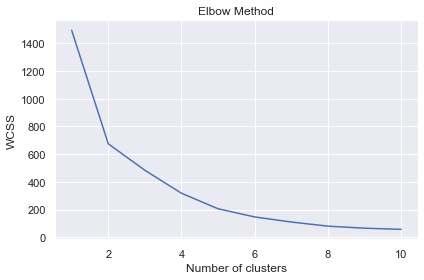

In [41]:
# do a elbow method to find the best number of clusters

# Elbow method to find the optimal number of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42, n_init=10)
    kmeans.fit(data_std)
    wcss.append(kmeans.inertia_)

# use seaborn to plot the elbow method and save it to png
# specify the size of the plot: 800px width and 600px height
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

sns.set()

# Generate some example data
plt.figure()
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.tight_layout()
plt.savefig('data/generated_PX/elbow_method_geo_clustering_StandardScaler.png', dpi=300, facecolor='white')



For n_clusters=2, the average silhouette_score is : 0.548
For n_clusters=3, the average silhouette_score is : 0.552
For n_clusters=4, the average silhouette_score is : 0.589
For n_clusters=5, the average silhouette_score is : 0.631
For n_clusters=6, the average silhouette_score is : 0.592
For n_clusters=7, the average silhouette_score is : 0.613
For n_clusters=8, the average silhouette_score is : 0.632
For n_clusters=9, the average silhouette_score is : 0.645
For n_clusters=10, the average silhouette_score is : 0.650


<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'Silhouette Analysis')

Text(0.5, 0, 'Number of clusters')

Text(0, 0.5, 'Silhouette score')

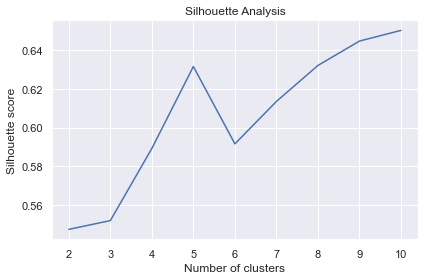

In [42]:
# do a silhouette analysis to find the best number of clusters
from sklearn.metrics import silhouette_score


silhouette_scores = []
for n_clusters in range(2, 11):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
    cluster_labels = kmeans.fit_predict(data_std)
    silhouette_avg = silhouette_score(data_std, cluster_labels)
    silhouette_scores.append(silhouette_avg)
    print(f"For n_clusters={n_clusters}, the average silhouette_score is : {silhouette_avg:.3f}")

# plot silhouette_scores with seaborn
# specify the size of the plot: 10 x 6 inches, 300 dpi
plt.figure()
plt.plot(range(2, 11), silhouette_scores)
plt.title('Silhouette Analysis')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score')
plt.tight_layout()
plt.savefig('data/generated_PX/silhouette_analysis_geo_clustering_StandardScaler.png', dpi=300, facecolor='white')









choose the number of clusters: 5

KMeans(n_clusters=5, n_init=10, random_state=42)

<Figure size 432x288 with 0 Axes>

/var/folders/2z/xnw84j3s6677slw3jh12jk_c0000gp/T/ipykernel_57769/2655120329.py:29: UserWarning: The palette list has more values (14) than needed (5), which may not be intended.
  sns.scatterplot(x='latitude', y='longitude', data=data, hue=labels, palette=colors)


<AxesSubplot:xlabel='latitude', ylabel='longitude'>

Text(0.5, 1.0, 'Clustering of Customers')

Text(0.5, 0, 'Latitude')

Text(0, 0.5, 'Longitude')

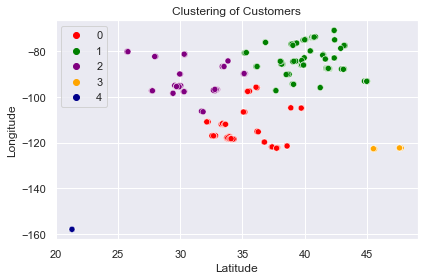

In [43]:

# ==== continue with the best number of clusters found in the elbow method and silhouette analysis

# Create a KMeans model with the desired number of clusters, metric='haversine' and random_state=42




kmeans = KMeans(n_clusters=5, n_init = 10, random_state=42)

# Fit the model to the standardized data
kmeans.fit(data_std)

# Get the cluster labels
labels = kmeans.labels_

# # Visualize the clusters
# plt.scatter(data['latitude'], data['longitude'], c=labels, cmap='viridis')
# plt.title('Clustering of Customers')
# plt.xlabel('Latitude')
# plt.ylabel('Longitude')
# plt.show()

# Visualize the clusters with seaborn
# specify the size of the plot: 10 x 6 inches, 300 dpi
# use this color : colors = ['red', 'green', 'purple', 'orange', 'darkblue', 'darkgreen', 'cadetblue', 'lightgreen', 'gray', 'black', 'lightgray', 'lightblue', 'darkred'] # lightred is not visible
colors = ['red', 'green', 'purple', 'orange', 'darkblue', 'darkgreen', 'cadetblue', 'lightgreen', 'gray', 'black', 'lightgray', 'lightblue', 'darkred'] # lightred is not visible

plt.figure()
sns.scatterplot(x='latitude', y='longitude', data=data, hue=labels, palette=colors)
plt.title('Clustering of Customers')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.tight_layout()
plt.savefig('data/generated_PX/geo_clustering_StandardScaler.png', dpi=300, facecolor='white')



In [44]:
# list the color name used in the plot
import matplotlib.colors as mcolors
print(mcolors.CSS4_COLORS)
# list the length of the color name used in the plot
len(mcolors.CSS4_COLORS)

{'aliceblue': '#F0F8FF', 'antiquewhite': '#FAEBD7', 'aqua': '#00FFFF', 'aquamarine': '#7FFFD4', 'azure': '#F0FFFF', 'beige': '#F5F5DC', 'bisque': '#FFE4C4', 'black': '#000000', 'blanchedalmond': '#FFEBCD', 'blue': '#0000FF', 'blueviolet': '#8A2BE2', 'brown': '#A52A2A', 'burlywood': '#DEB887', 'cadetblue': '#5F9EA0', 'chartreuse': '#7FFF00', 'chocolate': '#D2691E', 'coral': '#FF7F50', 'cornflowerblue': '#6495ED', 'cornsilk': '#FFF8DC', 'crimson': '#DC143C', 'cyan': '#00FFFF', 'darkblue': '#00008B', 'darkcyan': '#008B8B', 'darkgoldenrod': '#B8860B', 'darkgray': '#A9A9A9', 'darkgreen': '#006400', 'darkgrey': '#A9A9A9', 'darkkhaki': '#BDB76B', 'darkmagenta': '#8B008B', 'darkolivegreen': '#556B2F', 'darkorange': '#FF8C00', 'darkorchid': '#9932CC', 'darkred': '#8B0000', 'darksalmon': '#E9967A', 'darkseagreen': '#8FBC8F', 'darkslateblue': '#483D8B', 'darkslategray': '#2F4F4F', 'darkslategrey': '#2F4F4F', 'darkturquoise': '#00CED1', 'darkviolet': '#9400D3', 'deeppink': '#FF1493', 'deepskyblue'

148

## plot again the the addresses on the map
using the cluster labels as color

In [45]:
# plot again the the addresses on the map
# using the cluster labels as color
import folium

# Create a map centered on the first customer's location
location = [twm_customer_wrk['latitude'][0], twm_customer_wrk['longitude'][0]]
m = folium.Map(location=location, zoom_start=12)

# Create a dictionary to store the popup text and cluster labels for each location
popup_dict = {}

# Add markers for each customer's location
for index, row in twm_customer_wrk.iterrows():
    # Create a popup text and cluster label for the current location
    popup_text = f"CUSTOMER IDs: "
    cluster_label = kmeans.labels_[index]
    if (row['latitude'], row['longitude']) in popup_dict:
        popup_text, cluster_label = popup_dict[(row['latitude'], row['longitude'])]
        popup_text += f"{row['CUST_cust_id']}, "
    else:
        popup_text += f"{row['CUST_cust_id']}, "
    popup_dict[(row['latitude'], row['longitude'])] = (popup_text, cluster_label)

# Add markers for each location with cluster 'labels' as color
# prepare the marker color list
# 'labels' .nunique is the color number
# find out the unique values in 'labels'
# create a list of colors
# num_of_colors = kmeans.labels_.nunique()
colors = ['red', 'green', 'purple', 'orange', 'darkblue', 'darkgreen', 'cadetblue', 'lightgreen', 'gray', 'black', 'lightgray', 'lightblue', 'darkred'] # lightred is not visible


for location, (popup_text, cluster_label) in popup_dict.items():
    # Remove the trailing comma from the popup text
    popup_text = popup_text[:-2]
    popup = folium.Popup(popup_text + f" (Cluster {cluster_label})", max_width=200)
    # for each unique value in 'labels', use a different color
    marker = folium.Marker(location=location, popup=popup, icon=folium.Icon(color=colors[cluster_label]))
    # marker = folium.Marker(location=location, popup=popup, icon=folium.Icon(color=f'lightblue'))
    marker.add_to(m)

# Auto zoom to enclose all the markers
m.fit_bounds(m.get_bounds(), padding=(30, 30))

# Display the map
m;


In [46]:
m

In [47]:
import time

time.sleep(2)



In [48]:

m.save('data/generated_PX/customer_address_LL_map_geo_clustering_StandardScaler.html')



# Save the map as a PNG file
img_data = m._to_png()
with open("data/generated_PX/customer_address_LL_map_geo_clustering_StandardScaler.png", "wb") as f:
    f.write(img_data)

356074

# Use the Hierarchical Clustering for the LL

In [49]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from sklearn.metrics.pairwise import haversine_distances, euclidean_distances
import numpy as np

# Load the dataset and select only the 'latitude' and 'longitude' columns
data = twm_customer_wrk[['latitude', 'longitude']]

# Normalize the data
scaler = StandardScaler()
data = scaler.fit_transform(data)

# Perform clustering with Euclidean distance
model = AgglomerativeClustering(n_clusters=5, metric='euclidean', linkage='ward')
labels_Euclidean = model.fit_predict(data)

# Perform clustering with Haversine distance
data_radians = np.radians(data)
dist_matrix = haversine_distances(data_radians)
model = AgglomerativeClustering(n_clusters=5, metric='precomputed', linkage='average')
labels_Haversine = model.fit_predict(dist_matrix)

# # save labels_Euclidean and  labels_Haversine
# np.savetxt("labels_Euclidean.csv", labels_Euclidean, delimiter=",")
# np.savetxt("labels_Haversine.csv", labels_Haversine, delimiter=",")


## Plot again the the addresses on the map - Agglomerative clustering - Euclidean distance
using the cluster labels as color

In [50]:
# plot again the the addresses on the map
# using the cluster labels as color
import folium

# Create a map centered on the first customer's location
location = [twm_customer_wrk['latitude'][0], twm_customer_wrk['longitude'][0]]
m = folium.Map(location=location, zoom_start=12)

# Create a dictionary to store the popup text and cluster labels for each location
popup_dict = {}

# Add markers for each customer's location
for index, row in twm_customer_wrk.iterrows():
    # Create a popup text and cluster label for the current location
    popup_text = f"CUSTOMER IDs: "
    cluster_label = labels_Euclidean[index]
    if (row['latitude'], row['longitude']) in popup_dict:
        popup_text, cluster_label = popup_dict[(row['latitude'], row['longitude'])]
        popup_text += f"{row['CUST_cust_id']}, "
    else:
        popup_text += f"{row['CUST_cust_id']}, "
    popup_dict[(row['latitude'], row['longitude'])] = (popup_text, cluster_label)

# Add markers for each location with cluster 'labels' as color
# prepare the marker color list
# 'labels' .nunique is the color number
# find out the unique values in 'labels'
# create a list of colors
# num_of_colors = kmeans.labels_.nunique()
colors = ['red', 'green', 'purple', 'orange', 'darkblue', 'darkgreen', 'cadetblue', 'lightgreen', 'gray', 'black', 'lightgray', 'lightblue', 'darkred'] # lightred is not visible


for location, (popup_text, cluster_label) in popup_dict.items():
    # Remove the trailing comma from the popup text
    popup_text = popup_text[:-2]
    popup = folium.Popup(popup_text + f" (Cluster {cluster_label})", max_width=200)
    # for each unique value in 'labels', use a different color
    marker = folium.Marker(location=location, popup=popup, icon=folium.Icon(color=colors[cluster_label]))
    # marker = folium.Marker(location=location, popup=popup, icon=folium.Icon(color=f'lightblue'))
    marker.add_to(m)

# Auto zoom to enclose all the markers
m.fit_bounds(m.get_bounds(), padding=(30, 30))

# Display the map
m;


In [51]:
m

In [52]:
import time

time.sleep(2)



In [53]:

m.save('data/generated_PX/customer_address_LL_map_geo_clustering_AgglomerativeClustering_Euclidean.html')



# Save the map as a PNG file
img_data = m._to_png()
with open("data/generated_PX/customer_address_LL_map_geo_clustering_AgglomerativeClustering_Euclidean.png", "wb") as f:
    f.write(img_data)

351713

## Plot again the the addresses on the map - Agglomerative clustering - Haversine distance
using the cluster labels as color

In [54]:
# plot again the the addresses on the map
# using the cluster labels as color
import folium

# Create a map centered on the first customer's location
location = [twm_customer_wrk['latitude'][0], twm_customer_wrk['longitude'][0]]
m = folium.Map(location=location, zoom_start=12)

# Create a dictionary to store the popup text and cluster labels for each location
popup_dict = {}

# Add markers for each customer's location
for index, row in twm_customer_wrk.iterrows():
    # Create a popup text and cluster label for the current location
    popup_text = f"CUSTOMER IDs: "
    cluster_label = labels_Haversine[index]
    if (row['latitude'], row['longitude']) in popup_dict:
        popup_text, cluster_label = popup_dict[(row['latitude'], row['longitude'])]
        popup_text += f"{row['CUST_cust_id']}, "
    else:
        popup_text += f"{row['CUST_cust_id']}, "
    popup_dict[(row['latitude'], row['longitude'])] = (popup_text, cluster_label)

# Add markers for each location with cluster 'labels' as color
# prepare the marker color list
# 'labels' .nunique is the color number
# find out the unique values in 'labels'
# create a list of colors
# num_of_colors = kmeans.labels_.nunique()
colors = ['red', 'green', 'purple', 'orange', 'darkblue', 'darkgreen', 'cadetblue', 'lightgreen', 'gray', 'black', 'lightgray', 'lightblue', 'darkred'] # lightred is not visible


for location, (popup_text, cluster_label) in popup_dict.items():
    # Remove the trailing comma from the popup text
    popup_text = popup_text[:-2]
    popup = folium.Popup(popup_text + f" (Cluster {cluster_label})", max_width=200)
    # for each unique value in 'labels', use a different color
    marker = folium.Marker(location=location, popup=popup, icon=folium.Icon(color=colors[cluster_label]))
    # marker = folium.Marker(location=location, popup=popup, icon=folium.Icon(color=f'lightblue'))
    marker.add_to(m)

# Auto zoom to enclose all the markers
m.fit_bounds(m.get_bounds(), padding=(30, 30))

# Display the map
m;


In [55]:
m

In [56]:
import time

time.sleep(2)



In [57]:

m.save('data/generated_PX/customer_address_LL_map_geo_clustering_AgglomerativeClustering_Haversine.html')



# Save the map as a PNG file
img_data = m._to_png()
with open("data/generated_PX/customer_address_LL_map_geo_clustering_AgglomerativeClustering_Haversine.png", "wb") as f:
    f.write(img_data)

353359

# Feature Engineering: Convert the 

In [205]:
twm_customer_wrk2 = twm_customer_wrk.copy()

In [206]:
twm_customer_wrk2.columns
twm_customer_wrk2.info()

Index(['CUST_cust_id', 'CUST_income', 'CUST_age', 'CUST_years_with_bank',
       'CUST_nbr_children', 'CUST_gender', 'CUST_marital_status',
       'CUST_name_prefix', 'CUST_first_name', 'CUST_last_name',
       'CUST_street_nbr', 'CUST_street_name', 'CUST_postal_code',
       'CUST_city_name', 'CUST_state_code', 'latitude', 'longitude',
       'address'],
      dtype='object')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 747 entries, 0 to 746
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CUST_cust_id          747 non-null    int64  
 1   CUST_income           747 non-null    int64  
 2   CUST_age              747 non-null    int64  
 3   CUST_years_with_bank  747 non-null    int64  
 4   CUST_nbr_children     747 non-null    int64  
 5   CUST_gender           747 non-null    object 
 6   CUST_marital_status   747 non-null    int64  
 7   CUST_name_prefix      747 non-null    object 
 8   CUST_first_name       747 non-null    object 
 9   CUST_last_name        747 non-null    object 
 10  CUST_street_nbr       747 non-null    int64  
 11  CUST_street_name      747 non-null    object 
 12  CUST_postal_code      747 non-null    int64  
 13  CUST_city_name        747 non-null    object 
 14  CUST_state_code       747 non-null    object 
 15  latitude              7

In [207]:
# keep the following columns: 
# CUST_cust_id         
# CUST_income          
# CUST_age             
# CUST_years_with_bank 
# CUST_nbr_children    
# CUST_gender          
# CUST_marital_status  
# latitude             
# longitude            

# drop:        
# CUST_name_prefix      
# CUST_first_name       
# CUST_last_name        
# CUST_street_nbr       
# CUST_street_name      
# CUST_postal_code      
# CUST_city_name        
# CUST_state_code       
# address               

# drop columns from twm_customer_wrk2: 
twm_customer_wrk2.drop(['CUST_name_prefix', 'CUST_first_name', 'CUST_last_name', 'CUST_street_nbr', 'CUST_street_name', 'CUST_postal_code', 'CUST_city_name', 'CUST_state_code', 'address'], axis=1, inplace=True)



In [61]:
twm_customer_wrk2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 747 entries, 0 to 746
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CUST_cust_id          747 non-null    int64  
 1   CUST_income           747 non-null    int64  
 2   CUST_age              747 non-null    int64  
 3   CUST_years_with_bank  747 non-null    int64  
 4   CUST_nbr_children     747 non-null    int64  
 5   CUST_gender           747 non-null    object 
 6   CUST_marital_status   747 non-null    int64  
 7   latitude              747 non-null    float64
 8   longitude             747 non-null    float64
dtypes: float64(2), int64(6), object(1)
memory usage: 52.6+ KB


In [62]:
# nunique() of each column
twm_customer_wrk2.nunique()

CUST_cust_id            747
CUST_income             640
CUST_age                 77
CUST_years_with_bank     10
CUST_nbr_children         6
CUST_gender               2
CUST_marital_status       4
latitude                385
longitude               383
dtype: int64

In [63]:
twm_customer_wrk2.CUST_years_with_bank.unique()
twm_customer_wrk2.CUST_nbr_children.unique()
twm_customer_wrk2.CUST_gender.unique()
twm_customer_wrk2.CUST_marital_status.unique()

array([5, 1, 8, 3, 9, 6, 0, 2, 4, 7])

array([1, 0, 2, 5, 3, 4])

array(['M ', 'F '], dtype=object)

array([2, 1, 4, 3])

In [208]:
# convert to column 'CUST_gender' of twm_customer_wrk2
# 'M' --> 1
# 'F' --> 0
twm_customer_wrk2 ['gender_indicator'] = twm_customer_wrk2['CUST_gender'].apply(lambda x: 1 if x == 'M ' else 0)




In [65]:
twm_customer_wrk2['gender_indicator'].unique()

array([1, 0])

In [209]:
# drop 'CUST_gender' column from twm_customer_wrk2, inplace.
twm_customer_wrk2.drop(['CUST_gender'], axis=1, inplace=True)


In [67]:
twm_customer_wrk2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 747 entries, 0 to 746
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CUST_cust_id          747 non-null    int64  
 1   CUST_income           747 non-null    int64  
 2   CUST_age              747 non-null    int64  
 3   CUST_years_with_bank  747 non-null    int64  
 4   CUST_nbr_children     747 non-null    int64  
 5   CUST_marital_status   747 non-null    int64  
 6   latitude              747 non-null    float64
 7   longitude             747 non-null    float64
 8   gender_indicator      747 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 52.6 KB


## KMeans clustering

## Add: Save png and save to dictionary

In [83]:
# interactive_switch = "On"
global interactive_switch

# interactive_switch = "On"
interactive_switch = "Off"

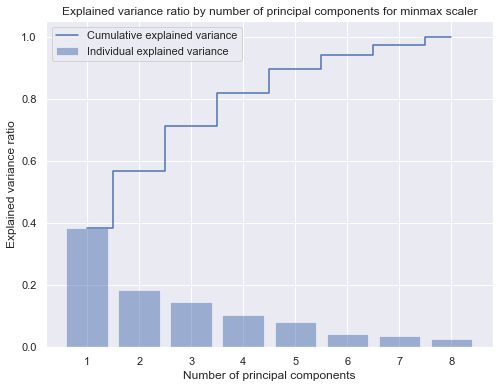

<Figure size 432x288 with 0 Axes>

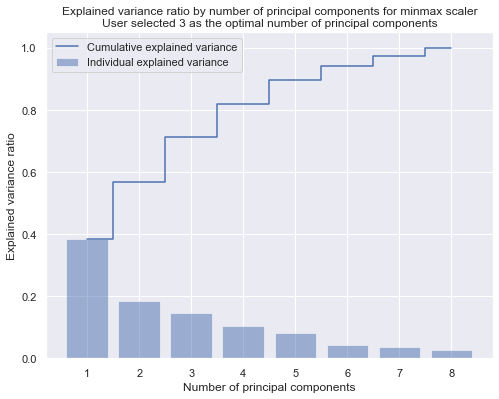

KMeans(n_clusters=2, n_init=10, random_state=42)

KMeans(n_clusters=3, n_init=10, random_state=42)

KMeans(n_clusters=4, n_init=10, random_state=42)

KMeans(n_clusters=5, n_init=10, random_state=42)

KMeans(n_clusters=6, n_init=10, random_state=42)

KMeans(n_clusters=7, n_init=10, random_state=42)

KMeans(n_init=10, random_state=42)

KMeans(n_clusters=9, n_init=10, random_state=42)

KMeans(n_clusters=10, n_init=10, random_state=42)

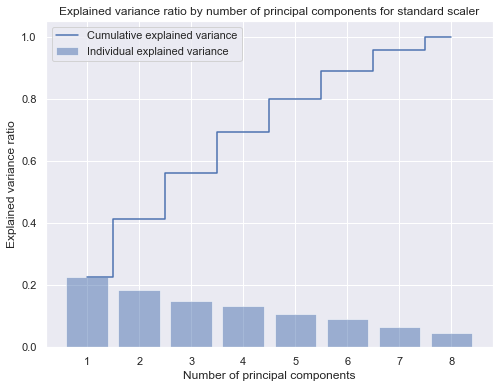

<Figure size 432x288 with 0 Axes>

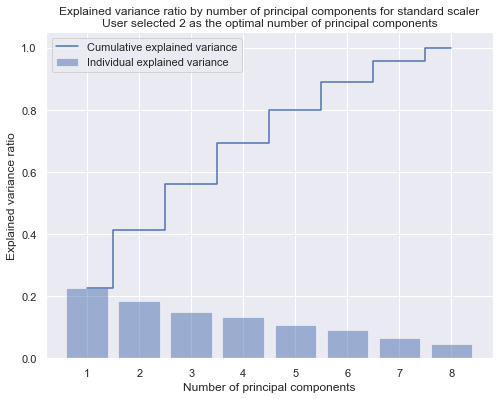

KMeans(n_clusters=2, n_init=10, random_state=42)

KMeans(n_clusters=3, n_init=10, random_state=42)

KMeans(n_clusters=4, n_init=10, random_state=42)

KMeans(n_clusters=5, n_init=10, random_state=42)

KMeans(n_clusters=6, n_init=10, random_state=42)

KMeans(n_clusters=7, n_init=10, random_state=42)

KMeans(n_init=10, random_state=42)

KMeans(n_clusters=9, n_init=10, random_state=42)

KMeans(n_clusters=10, n_init=10, random_state=42)

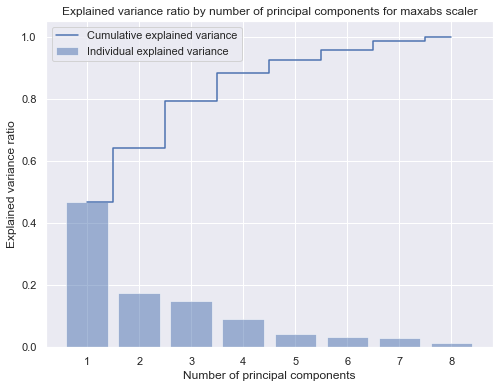

<Figure size 432x288 with 0 Axes>

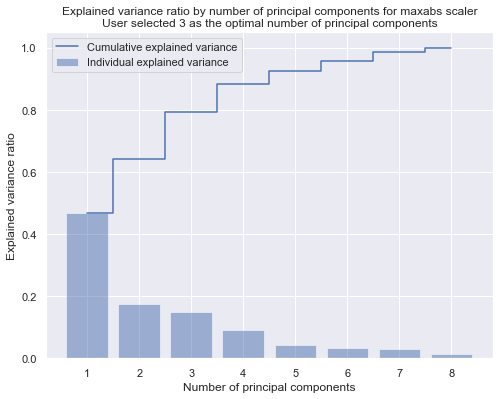

KMeans(n_clusters=2, n_init=10, random_state=42)

KMeans(n_clusters=3, n_init=10, random_state=42)

KMeans(n_clusters=4, n_init=10, random_state=42)

KMeans(n_clusters=5, n_init=10, random_state=42)

KMeans(n_clusters=6, n_init=10, random_state=42)

KMeans(n_clusters=7, n_init=10, random_state=42)

KMeans(n_init=10, random_state=42)

KMeans(n_clusters=9, n_init=10, random_state=42)

KMeans(n_clusters=10, n_init=10, random_state=42)

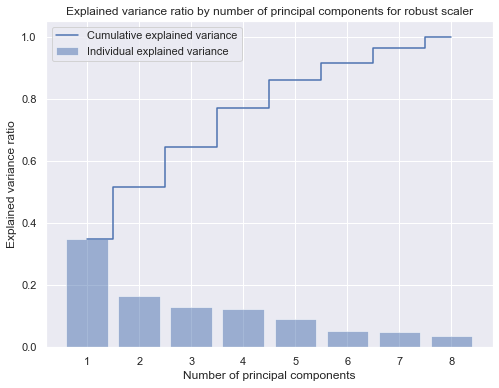

<Figure size 432x288 with 0 Axes>

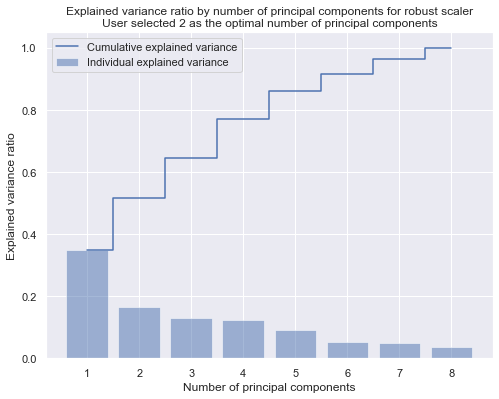

KMeans(n_clusters=2, n_init=10, random_state=42)

KMeans(n_clusters=3, n_init=10, random_state=42)

KMeans(n_clusters=4, n_init=10, random_state=42)

KMeans(n_clusters=5, n_init=10, random_state=42)

KMeans(n_clusters=6, n_init=10, random_state=42)

KMeans(n_clusters=7, n_init=10, random_state=42)

KMeans(n_init=10, random_state=42)

KMeans(n_clusters=9, n_init=10, random_state=42)

KMeans(n_clusters=10, n_init=10, random_state=42)

Text(0.5, 0, 'Number of Clusters (k)')

Text(0, 0.5, 'Silhouette Score')

Text(0, 0.5, 'Inertia')

Text(0.5, 1.0, 'minmax\nOptimal PCA n_components = 3')

Text(0.5, 0, 'Number of Clusters (k)')

Text(0, 0.5, 'Silhouette Score')

Text(0, 0.5, 'Inertia')

Text(0.5, 1.0, 'standard\nOptimal PCA n_components = 2')

Text(0.5, 0, 'Number of Clusters (k)')

Text(0, 0.5, 'Silhouette Score')

Text(0, 0.5, 'Inertia')

Text(0.5, 1.0, 'maxabs\nOptimal PCA n_components = 3')

Text(0.5, 0, 'Number of Clusters (k)')

Text(0, 0.5, 'Silhouette Score')

Text(0, 0.5, 'Inertia')

Text(0.5, 1.0, 'robust\nOptimal PCA n_components = 2')

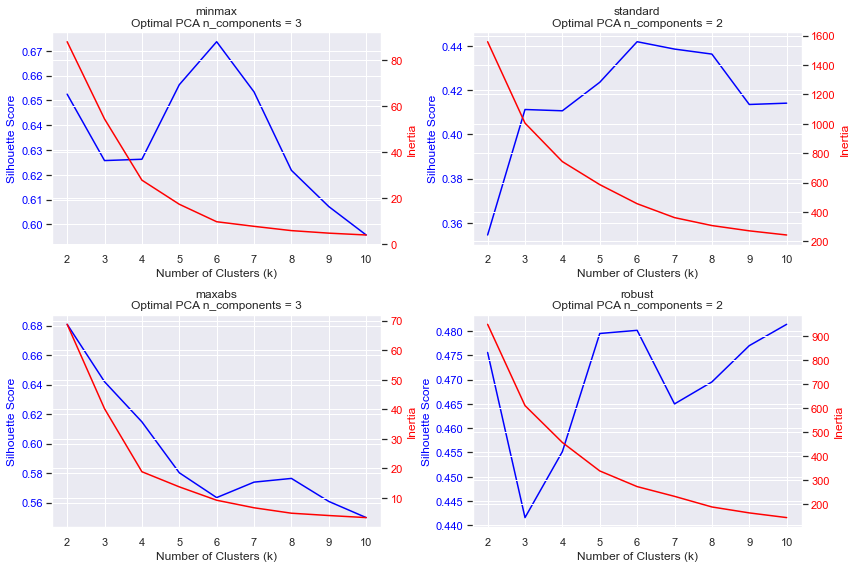

KMeans(n_clusters=3, n_init=10, random_state=42)

/var/folders/2z/xnw84j3s6677slw3jh12jk_c0000gp/T/ipykernel_57769/3055915509.py:256: UserWarning:

The palette list has more values (14) than needed (3), which may not be intended.



<AxesSubplot:>

Text(0.5, 0, 'PC1')

Text(0, 0.5, 'PC2')

Text(0.5, 1.0, 'minmax\nOptimal PCA n_components = 3\nNumber of Clusters = 3')

KMeans(n_clusters=4, n_init=10, random_state=42)

/var/folders/2z/xnw84j3s6677slw3jh12jk_c0000gp/T/ipykernel_57769/3055915509.py:256: UserWarning:

The palette list has more values (14) than needed (4), which may not be intended.



<AxesSubplot:>

Text(0.5, 0, 'PC1')

Text(0, 0.5, 'PC2')

Text(0.5, 1.0, 'standard\nOptimal PCA n_components = 2\nNumber of Clusters = 4')

KMeans(n_clusters=4, n_init=10, random_state=42)

/var/folders/2z/xnw84j3s6677slw3jh12jk_c0000gp/T/ipykernel_57769/3055915509.py:256: UserWarning:

The palette list has more values (14) than needed (4), which may not be intended.



<AxesSubplot:>

Text(0.5, 0, 'PC1')

Text(0, 0.5, 'PC2')

Text(0.5, 1.0, 'maxabs\nOptimal PCA n_components = 3\nNumber of Clusters = 4')

KMeans(n_clusters=5, n_init=10, random_state=42)

/var/folders/2z/xnw84j3s6677slw3jh12jk_c0000gp/T/ipykernel_57769/3055915509.py:256: UserWarning:

The palette list has more values (14) than needed (5), which may not be intended.



<AxesSubplot:>

Text(0.5, 0, 'PC1')

Text(0, 0.5, 'PC2')

Text(0.5, 1.0, 'robust\nOptimal PCA n_components = 2\nNumber of Clusters = 5')

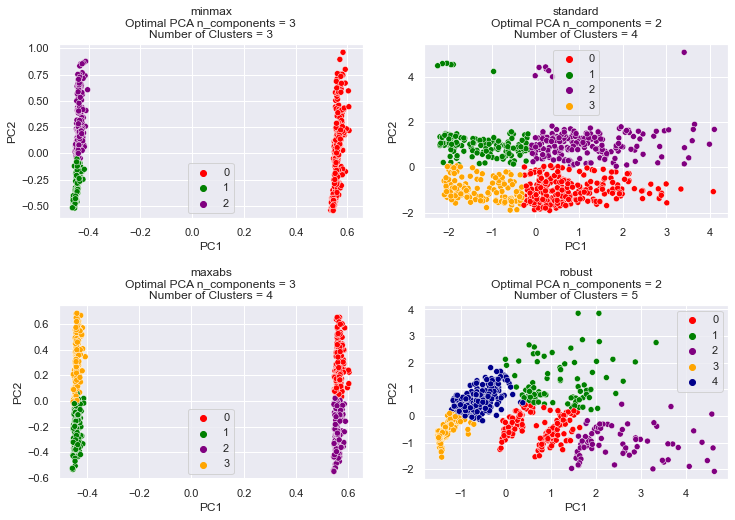

In [84]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler, StandardScaler, MaxAbsScaler, RobustScaler
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt


def optimal_PCA_n_components(X, scaler_name):
    """
    Plots the cumulative explained variance and individual explained variance
    bar chart to help determine the optimal number of principal components to use
    in PCA.

    Returns:
        optimal_n_components (int): the number of principal components to use
            in PCA.
    """
    # Define different numbers of components to try
    n_components = range(1, X.shape[1]+1)

    # Initialize empty lists to store the explained variances
    cum_explained_variances = []
    individual_explained_variances = []

    # Loop through different numbers of components
    for n in n_components:

        # Initialize PCA with n components
        pca = PCA(n_components=n)

        # Fit PCA to the data
        pca.fit(X)

        # Get the explained variances
        cum_explained_variances.append(np.sum(pca.explained_variance_ratio_))
        individual_explained_variances.append(pca.explained_variance_ratio_[-1])

    # Plot the variance explained by each principal component
    plt.figure(figsize=(8, 6))

    # Plot the individual explained variance as bars
    plt.bar(n_components, individual_explained_variances, alpha=0.5,
            align='center', label='Individual explained variance')

    # Plot the cumulative explained variance as a stair line
    plt.step(n_components, cum_explained_variances,
             where='mid', label='Cumulative explained variance')

    plt.xlabel('Number of principal components')
    plt.ylabel('Explained variance ratio')
    plt.title(f'Explained variance ratio by number of principal components for {scaler_name} scaler')
    plt.legend(loc='best')
    plt.show()

    if interactive_switch == "On":
        # Get user input for the desired number of principal components to use
        optimal_n_components = 0
        while optimal_n_components < 2:
            optimal_n_components = int(input("Enter the desired number (>=2) of principal components to use: "))
            if optimal_n_components < 2:
                print("Input must be greater than 1")
    elif interactive_switch == "Off":
        # Set the optimal number of principal components to use
        if scaler_name == "minmax" or scaler_name == "maxabs":
            optimal_n_components = 3
        elif scaler_name == "standard" or scaler_name == "robust":
            optimal_n_components = 2
    
    # Plot the variance explained by each principal component
    plt.clf()
    plt.figure(figsize=(8, 6))

    # Plot the individual explained variance as bars
    plt.bar(n_components, individual_explained_variances, alpha=0.5,
            align='center', label='Individual explained variance')

    # Plot the cumulative explained variance as a stair line
    plt.step(n_components, cum_explained_variances,
             where='mid', label='Cumulative explained variance')

    plt.xlabel('Number of principal components')
    plt.ylabel('Explained variance ratio')
    plt.title(f'Explained variance ratio by number of principal components for {scaler_name} scaler\nUser selected {optimal_n_components} as the optimal number of principal components')
    plt.legend(loc='best')
    # plt.show()

    plt.savefig(f'data/generated_PX/optimal_n_components_{scaler_name}.png', dpi=300, facecolor='white')
    plt.show();

    return optimal_n_components

# Load the dataset

# Select relevant columns for clustering
X = twm_customer_wrk2[['CUST_income', 'CUST_age', 'CUST_years_with_bank', 'CUST_nbr_children', 'CUST_marital_status', 'latitude', 'longitude', 'gender_indicator']]

# Define different scalers
scalers = {'minmax': MinMaxScaler(), 
           'standard': StandardScaler(), 
           'maxabs': MaxAbsScaler(), 
           'robust': RobustScaler()}

# Initialize empty dictionary to store results for different scalers
results = {}

# Initialize empty dictionary to store PCA-contributing features
pca_contributing_features = {}

# Loop through different scalers
optimal_n_components_by_scaler_dict = {}
optimal_k_by_scaler_dict = {}

# Loop through different scalers
for scaler_name, scaler in scalers.items():
    
    # Scale the data
    X_scaled = scaler.fit_transform(X)
    
    # ====  Determine the optimal number of principal components to use in PCA =====
    # Determine the optimal number of principal components to use in PCA
    optimal_n_components = optimal_PCA_n_components(X_scaled, scaler_name)
    optimal_n_components_by_scaler_dict[scaler_name] = optimal_n_components
    
    # Initialize PCA with the optimal number of components
    pca = PCA(n_components=optimal_n_components)
    # ==============================================================================
    
    # Initialize PCA with 2 components
    pca = PCA(n_components=2)
    
    # Fit PCA to the scaled data
    X_pca = pca.fit_transform(X_scaled)
    
    # Initialize empty lists to store silhouette scores and inertias
    silhouette_scores = []
    inertias = []
    
    # ======================== Contributive Features================================
    # Get the PCA components
    components = pca.components_
    
    # Get the features with the highest contribution to PC1 and PC2
    pc1_features = [(X.columns[i], round(abs(components[0][i])*100, 2)) for i in range(len(X.columns))]
    pc1_features.sort(key=lambda x: x[1], reverse=True)
    pc1_top3 = pc1_features[:3]
    
    pc2_features = [(X.columns[i], round(abs(components[1][i])*100, 2)) for i in range(len(X.columns))]
    pc2_features.sort(key=lambda x: x[1], reverse=True)
    pc2_top3 = pc2_features[:3]
    
    # Store the top 3 contributing features for the current scaler
    pca_contributing_features[scaler_name] = {'PC1': pc1_top3, 'PC2': pc2_top3}
    
    # components[0][i] means the ith feature's contribution to PC1
    # components[1][i] means the ith feature's contribution to PC2
    # =============================================================================
    
    # Loop through different numbers of clusters
    for k in range(2, 11):
        
        # Initialize KMeans with k clusters
        kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
        
        # Fit KMeans to the PCA-transformed data
        kmeans.fit(X_pca)
        
        # Calculate silhouette score and inertia
        silhouette_scores.append(silhouette_score(X_pca, kmeans.labels_))
        inertias.append(kmeans.inertia_)
        
    # Store the results for the current scaler in the dictionary
    results[scaler_name] = {'silhouette_scores': silhouette_scores, 'inertias': inertias}



# Get the default figure size
default_size = plt.rcParams['figure.figsize']

# Set the figure size as twice the height of the default size
figsize = (default_size[0]*2, default_size[1] * 2)
    
# Plot the results for each scaler
fig, axs = plt.subplots(2, 2, figsize=figsize)

for i, (scaler_name, result) in enumerate(results.items()):
    ax = axs[i // 2][i % 2]
    ax.plot(range(2, 11), result['silhouette_scores'], label='Silhouette Score', color='blue')
    ax.set_xlabel('Number of Clusters (k)')
    ax.set_ylabel('Silhouette Score', color='blue')
    ax.tick_params(axis='y', labelcolor='blue')
    ax2 = ax.twinx()
    ax2.plot(range(2, 11), result['inertias'], label='Inertia', color='red')
    ax2.set_ylabel('Inertia', color='red')
    ax2.tick_params(axis='y', labelcolor='red')
    ax.set_title(f'{scaler_name}\nOptimal PCA n_components = {optimal_n_components_by_scaler_dict[scaler_name]}')

plt.tight_layout()
plt.savefig('data/generated_PX/silhouette_elbow_by_scalers.png', dpi=300, facecolor='white')
plt.show()

# # Based on the elbow method and silhouette score, set k = 4 and use the optimal scaler
# num_clusters = 4

if interactive_switch == 'On':
# Prompt user for cluster numbers
    while True:
        try:
            cluster_nums_str = input("Enter four integer values separated by commas for the number of clusters for each scaler (minmax/standard/maxabs/robust): ")
            cluster_nums = [int(num.strip()) for num in cluster_nums_str.split(',')]
            if len(cluster_nums) != 4:
                raise ValueError
            break
        except ValueError:
            print("Please enter exactly four comma-separated integers")
elif interactive_switch == 'Off':
    cluster_nums = [3,4,4,5]
    
# # Create a new figure with the specified size
# fig, ax = plt.subplots(figsize=figsize)

colors = ['red', 'green', 'purple', 'orange', 'darkblue', 'darkgreen', 'cadetblue', 'lightgreen', 'gray', 'black', 'lightgray', 'lightblue', 'darkred'] # lightred is not visible

# Initialize subplots for each scaler
fig, axs = plt.subplots(2, 2, figsize=figsize)
fig.subplots_adjust(hspace=0.5)

# Initialize a dictionary to store the cluster labels
labels_by_scaler = {}

# Loop through different scalers
for i, (scaler_name, scaler) in enumerate(scalers.items()):
    num_clusters = cluster_nums[i]
    # Scale the data
    X_scaled = scaler.fit_transform(X)
    
    # Initialize PCA with 2 components
    pca = PCA(n_components= optimal_n_components_by_scaler_dict[scaler_name])
    
    # Fit PCA to the scaled data
    X_pca = pca.fit_transform(X_scaled)
    
    # Initialize KMeans with k clusters
    kmeans = KMeans(n_clusters=num_clusters, random_state=42, n_init=10)
    
    # Fit KMeans to the PCA-transformed data
    kmeans.fit(X_pca)
    
    # Get the cluster labels
    labels = kmeans.labels_
    
    # Plot the clusters on PC1 and PC2 using Seaborn
    sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=labels, palette=colors, ax=axs[i//2, i%2])
    axs[i//2, i%2].set_xlabel('PC1')
    axs[i//2, i%2].set_ylabel('PC2')
    axs[i//2, i%2].set_title(f'{scaler_name}\nOptimal PCA n_components = {optimal_n_components_by_scaler_dict[scaler_name]}\nNumber of Clusters = {num_clusters}')
    labels_by_scaler[scaler_name] = labels
    
# Save the subplots as PNG files
plt.savefig('data/generated_PX/kmeans_PC1_PC2_by_scalers.png', dpi=300, facecolor='white', facecolor='white')



    
    


In [85]:
from tabulate import tabulate

# Print the results
table_data = []
for scaler_name, features in pca_contributing_features.items():
    table_data.append([scaler_name, f"{features['PC1'][0][0]} ({features['PC1'][0][1]}%)", 
                       f"{features['PC1'][1][0]} ({features['PC1'][1][1]}%)",
                       f"{features['PC1'][2][0]} ({features['PC1'][2][1]}%)",
                       f"{features['PC2'][0][0]} ({features['PC2'][0][1]}%)",
                       f"{features['PC2'][1][0]} ({features['PC2'][1][1]}%)",
                       f"{features['PC2'][2][0]} ({features['PC2'][2][1]}%)"])

headers = ["Scaler Name", "PC1 (1st)", "PC1 (2nd)", "PC1 (3rd)", "PC2 (1st)", "PC2 (2nd)", "PC2 (3rd)"]
print(tabulate(table_data, headers=headers, tablefmt="grid"))

+---------------+------------------------------+------------------------------+----------------------------+-------------------------------+-------------------+------------------------------+
| Scaler Name   | PC1 (1st)                    | PC1 (2nd)                    | PC1 (3rd)                  | PC2 (1st)                     | PC2 (2nd)         | PC2 (3rd)                    |
+===============+==============================+==============================+============================+===============================+===================+==============================+
| minmax        | gender_indicator (99.84%)    | CUST_income (5.15%)          | longitude (1.49%)          | CUST_marital_status (80.12%)  | CUST_age (41.74%) | CUST_nbr_children (36.14%)   |
+---------------+------------------------------+------------------------------+----------------------------+-------------------------------+-------------------+------------------------------+
| standard      | CUST_marital_status (5

In [86]:
# Print the results as markdown table
print("| Scaler Name | <span style='color:#FFD700'>PC1</span> Feature 1 | <span style='color:#FFD700'>PC1</span> Feature 2 | <span style='color:#FFD700'>PC1</span> Feature 3 | <span style='color:#90EE90'>PC2</span> Feature 1 | <span style='color:#90EE90'>PC2</span> Feature 2 | <span style='color:#90EE90'>PC2</span> Feature 3 |")
print("| --- | --- | --- | --- | --- | --- | --- |")

for scaler_name, features in pca_contributing_features.items():
    pc1_features = features['PC1'][:3]
    pc2_features = features['PC2'][:3]
    
    # Build row for current scaler
    row = [scaler_name]
    for feature in pc1_features:
        row.append(f"{feature[0]} ({feature[1]}%)")
    for feature in pc2_features:
        row.append(f"{feature[0]} ({feature[1]}%)")
    
    # Print row as markdown table row
    print("| " + " | ".join(row) + " |")


| Scaler Name | <span style='color:#FFD700'>PC1</span> Feature 1 | <span style='color:#FFD700'>PC1</span> Feature 2 | <span style='color:#FFD700'>PC1</span> Feature 3 | <span style='color:#90EE90'>PC2</span> Feature 1 | <span style='color:#90EE90'>PC2</span> Feature 2 | <span style='color:#90EE90'>PC2</span> Feature 3 |
| --- | --- | --- | --- | --- | --- | --- |
| minmax | gender_indicator (99.84%) | CUST_income (5.15%) | longitude (1.49%) | CUST_marital_status (80.12%) | CUST_age (41.74%) | CUST_nbr_children (36.14%) |
| standard | CUST_marital_status (59.59%) | CUST_income (49.1%) | CUST_nbr_children (48.92%) | longitude (69.72%) | latitude (66.89%) | CUST_age (18.05%) |
| maxabs | gender_indicator (99.86%) | CUST_income (5.1%) | CUST_nbr_children (0.78%) | CUST_years_with_bank (94.53%) | CUST_age (29.23%) | CUST_marital_status (12.02%) |
| robust | CUST_nbr_children (75.14%) | CUST_marital_status (51.29%) | CUST_income (39.92%) | CUST_income (64.37%) | CUST_age (50.44%) | CUST_nbr_

| Scaler Name | <span style='color:#FFD700'>PC1</span> Feature 1 | <span style='color:#FFD700'>PC1</span> Feature 2 | <span style='color:#FFD700'>PC1</span> Feature 3 | <span style='color:#90EE90'>PC2</span> Feature 1 | <span style='color:#90EE90'>PC2</span> Feature 2 | <span style='color:#90EE90'>PC2</span> Feature 3 |
| --- | --- | --- | --- | --- | --- | --- |
| minmax | gender_indicator (99.84%) | CUST_income (5.15%) | longitude (1.49%) | CUST_marital_status (80.12%) | CUST_age (41.74%) | CUST_nbr_children (36.14%) |
| standard | CUST_marital_status (59.59%) | CUST_income (49.1%) | CUST_nbr_children (48.92%) | longitude (69.72%) | latitude (66.89%) | CUST_age (18.05%) |
| maxabs | gender_indicator (99.86%) | CUST_income (5.1%) | CUST_nbr_children (0.78%) | CUST_years_with_bank (94.53%) | CUST_age (29.23%) | CUST_marital_status (12.02%) |
| robust | CUST_nbr_children (75.14%) | CUST_marital_status (51.29%) | CUST_income (39.92%) | CUST_income (64.37%) | CUST_age (50.44%) | CUST_nbr_children (49.55%) |

## Compare the .reverse_transform() results to the original data

In [87]:
# reconstructed_data['standard'].shape


NameError: name 'reconstructed_data' is not defined

In [ ]:
# X.shape

(747, 8)

In [ ]:
# # Convert X's first 5 rows and reconstructed_data['standard']'s first 5 rows and concat up/down
# X_first_5 = pd.DataFrame(X[:5], columns=X.columns)
# reconstructed_first_5 = pd.DataFrame(reconstructed_data['standard'][:5], columns=X.columns)
# compare_standardscaler = pd.concat([X_first_5, reconstructed_first_5], axis=0)

In [ ]:
# compare_standardscaler

CUST_income   CUST_age  CUST_years_with_bank  CUST_nbr_children  \
0  26150.000000  46.000000              5.000000           1.000000   
1   6605.000000  71.000000              1.000000           0.000000   
2  18548.000000  38.000000              8.000000           0.000000   
3  47668.000000  54.000000              3.000000           0.000000   
4  44554.000000  59.000000              9.000000           2.000000   
0  27201.562380  43.232670              4.098769           1.119993   
1  21783.696444  39.627414              3.989783           0.848035   
2   9881.890317  30.416637              3.809097           0.355457   
3  19045.210131  37.434876              3.951541           0.740646   
4  55288.898757  67.641438              4.403602           2.065395   

   CUST_marital_status   latitude   longitude  gender_indicator  
0             2.000000  36.171563 -115.139101          1.000000  
1             2.000000  34.052234 -118.243685          1.000000  
2             1.000000  33.956850 -118.282946          0.000000  
3             1.000000  34.052234 -118.243685          0.000000  
4             4.000000  40.750000  -73.990000          0.000000  
0             2.163128  34.518052 -107.380739          0.454070  
1             1.897718  34.559179 -107.344067          0.429800  
2             1.350552  33.134749 -113.275013          0.372772  
3             1.773856  34.145499 -109.049750          0.416468  
4             3.380128  41.015151  -80.940488          0.596341

# Feature selection


In [124]:
twm_customer_wrk.columns
twm_customer_wrk2.columns

Index(['CUST_cust_id', 'CUST_income', 'CUST_age', 'CUST_years_with_bank',
       'CUST_nbr_children', 'CUST_gender', 'CUST_marital_status',
       'CUST_name_prefix', 'CUST_first_name', 'CUST_last_name',
       'CUST_street_nbr', 'CUST_street_name', 'CUST_postal_code',
       'CUST_city_name', 'CUST_state_code', 'latitude', 'longitude',
       'address'],
      dtype='object')

Index(['CUST_cust_id', 'CUST_income', 'CUST_age', 'CUST_years_with_bank',
       'CUST_nbr_children', 'CUST_marital_status', 'latitude', 'longitude',
       'gender_indicator'],
      dtype='object')

In [125]:
# keys of labels_by_scaler
labels_by_scaler.keys()

# shape or size of labels_by_scaler.values()
for i in labels_by_scaler.values():
    print(i.shape)


dict_keys(['minmax', 'standard', 'maxabs', 'robust'])

(747,)
(747,)
(747,)
(747,)


In [126]:
## Radar Chart

In [127]:


# define the data
# use this dataframe twm_customer_wrk2
# 
# check the rows of twm_customer_wrk2 and each value of the dictionary labels_by_scaler
# rows of twm_customer_wrk2
twm_customer_wrk2.shape

# row of labels_by_scaler
for i in labels_by_scaler.values():
    print(i.shape)
    


(747, 9)

(747,)
(747,)
(747,)
(747,)


The row number is the same as the cluster labels.

In [128]:
twm_customer_wrk2.columns

Index(['CUST_cust_id', 'CUST_income', 'CUST_age', 'CUST_years_with_bank',
       'CUST_nbr_children', 'CUST_marital_status', 'latitude', 'longitude',
       'gender_indicator'],
      dtype='object')

## Radar Chart - all-in-one plot

In [129]:
import plotly.graph_objects as go

# define the categories
categories = ['CUST_income', 'CUST_age', 'CUST_years_with_bank', 'CUST_nbr_children', 'CUST_marital_status']
# categories = selected_columns # ['CUST_income', 'CUST_age', 'CUST_years_with_bank', 'CUST_nbr_children', 'CUST_marital_status']

scalers = {'minmax': MinMaxScaler(), 
           'standard': StandardScaler(), 
           'maxabs': MaxAbsScaler(), 
           'robust': RobustScaler()}

for scaler_name, labels in labels_by_scaler.items():
    twm_customer_wrk2_for_radar = twm_customer_wrk2.copy()

    twm_customer_wrk2_for_radar = twm_customer_wrk2_for_radar[categories]
    # # standardize the data
    # twm_customer_wrk2_for_radar = (twm_customer_wrk2_for_radar - twm_customer_wrk2_for_radar.mean()) / twm_customer_wrk2_for_radar.std()
    # using the scaler_name to apply the scaler
    
    scaler  = scalers[scaler_name]
    
    twm_customer_wrk2_for_radar_scaled = scaler.fit_transform(twm_customer_wrk2_for_radar)
    # print('twm_customer_wrk2_for_radar_scaled: ', twm_customer_wrk2_for_radar_scaled)
    
    # find the number of clusters
    num_of_clusters = len(np.unique(labels))
    
    # create a new column with the cluster labels
    twm_customer_wrk2_for_radar_scaled = pd.DataFrame(twm_customer_wrk2_for_radar_scaled, columns=twm_customer_wrk2_for_radar.columns)
    twm_customer_wrk2_for_radar_scaled['label'] = pd.Series(labels, dtype=int)
    
    # group by label and find the mean
    twm_customer_wrk2_for_radar_scaled_pivot = twm_customer_wrk2_for_radar_scaled.groupby('label').mean()
    # twm_customer_wrk2_for_radar_scaled_pivot.shape

    # the i th row of the twm_customer_wrk2_for_radar_pivot
    # twm_customer_wrk2_for_radar_scaled_pivot.iloc[0]

    # twm_customer_wrk2_for_radar_pivot
    # min and max of all value in twm_customer_wrk2_for_radar_pivot
    radar_min = twm_customer_wrk2_for_radar_scaled_pivot.min().min()
    radar_max = twm_customer_wrk2_for_radar_scaled_pivot.max().max()
      
    fig = go.Figure()


    # get the number of clusters
    num_clusters = twm_customer_wrk2_for_radar_scaled_pivot.shape[0]

    # create a list to store the traces
    traces = []

    # loop through the clusters and add a trace for each
    for i in range(num_clusters):
        trace = go.Scatterpolar(
            r=twm_customer_wrk2_for_radar_scaled_pivot.iloc[i].tolist(),
            theta=categories,
            fill='toself',
            name=f'Cluster {i}'
        )
        traces.append(trace)

    # create the figure and add the traces
    # fig = go.Figure
    
    fig = go.Figure()


    # get the number of clusters
    num_clusters = twm_customer_wrk2_for_radar_scaled_pivot.shape[0]

    # create a list to store the traces
    traces = []

    # loop through the clusters and add a trace for each
    for i in range(num_clusters):
        trace = go.Scatterpolar(
            r=twm_customer_wrk2_for_radar_scaled_pivot.iloc[i].tolist(),
            theta=categories,
            fill='toself',
            name=f'Cluster {i}'
        )
        traces.append(trace)

    # create the figure and add the traces
    fig = go.Figure(data=traces)

    # # set the layout of the figure
    # fig.update_layout(
    #     polar=dict(
    #         radialaxis=dict(
    #             visible=True,
    #             range=[radar_min, radar_max]
    #         )),
    #     showlegend=True
    # )

    # show the figure
    fig.show()


## Radar Chart subplots

## V2 - This one works

In [130]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.io as pio

# define the categories
categories = ['CUST_income', 'CUST_age', 'CUST_years_with_bank', 'CUST_nbr_children', 'CUST_marital_status']

scalers = {
    'minmax': MinMaxScaler(),
    'standard': StandardScaler(),
    'maxabs': MaxAbsScaler(),
    'robust': RobustScaler()
}

for scaler_name, labels in labels_by_scaler.items():
    twm_customer_wrk2_for_radar = twm_customer_wrk2.copy()

    twm_customer_wrk2_for_radar = twm_customer_wrk2_for_radar[categories]

    # using the scaler_name to apply the scaler
    scaler = scalers[scaler_name]
    twm_customer_wrk2_for_radar_scaled = scaler.fit_transform(twm_customer_wrk2_for_radar)

    # find the number of clusters
    num_of_clusters = len(np.unique(labels))

    # create a new column with the cluster labels
    twm_customer_wrk2_for_radar_scaled = pd.DataFrame(twm_customer_wrk2_for_radar_scaled, columns=twm_customer_wrk2_for_radar.columns)
    twm_customer_wrk2_for_radar_scaled['label'] = pd.Series(labels, dtype=int)

    # group by label and find the mean
    twm_customer_wrk2_for_radar_scaled_pivot = twm_customer_wrk2_for_radar_scaled.groupby('label').mean()

    # get the number of clusters
    num_clusters = twm_customer_wrk2_for_radar_scaled_pivot.shape[0]
    
    # min and max of all value in twm_customer_wrk2_for_radar_pivot
    radar_min = twm_customer_wrk2_for_radar_scaled_pivot.min().min()
    radar_max = twm_customer_wrk2_for_radar_scaled_pivot.max().max()
    
    # create a subplot for each cluster
    fig = make_subplots(rows=1, cols=num_clusters, subplot_titles=[f'Cluster {i}' for i in range(num_clusters)],
                        specs=[[{'type': 'polar'}] * num_clusters])

    # loop through the clusters and add a trace to each subplot
    for i in range(num_clusters):
        fig.add_trace(go.Scatterpolar(
            r=twm_customer_wrk2_for_radar_scaled_pivot.iloc[i].tolist(),
            theta=categories,
            fill='toself',
            name=f'Cluster {i}'
        ), row=1, col=i+1)

        # set the layout of the subplot
        fig.update_layout(
            polar=dict(
                radialaxis=dict(
                    visible=False,
                    range=[radar_min, radar_max]
                )),
            showlegend=False
        )

    # set the title of the figure
    fig.update_layout(title=f'Radar Chart - {scaler_name.capitalize()}')

    # save the figure as PNG
    fig.write_image(f'data/generated_PX/radar_{scaler_name}.png', width=1200, height=600, scale=2)


------
# Reference Code
```python
import plotly.graph_objects as go

# categories = ['processing cost','mechanical properties','chemical stability',
#               'thermal stability', 'device integration']
categories = selected_columns # ['CUST_income', 'CUST_age', 'CUST_years_with_bank', 'CUST_nbr_children', 'CUST_marital_status']

fig = go.Figure()

fig.add_trace(go.Scatterpolar(
      r=[1, 5, 2, 2, 3],
      theta=categories,
      fill='toself',
      name='Product A'
))
fig.add_trace(go.Scatterpolar(
      r=[4, 3, 2.5, 1, 2],
      theta=categories,
      fill='toself',
      name='Product B'
))

fig.update_layout(
  polar=dict(
    radialaxis=dict(
      visible=True,
      range=[0, 5]
    )),
  showlegend=False
)

fig.show()
```
---------

#  Starting Feature Selection:


In [267]:
twm_customer_wrk2.columns
twm_customer_wrk2.shape
twm_customer_wrk2.info()
twm_customer_wrk2.describe()


Index(['CUST_cust_id', 'CUST_income', 'CUST_age', 'CUST_years_with_bank',
       'CUST_nbr_children', 'CUST_marital_status', 'latitude', 'longitude',
       'gender_indicator'],
      dtype='object')

(747, 9)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 747 entries, 0 to 746
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CUST_cust_id          747 non-null    int64  
 1   CUST_income           747 non-null    int64  
 2   CUST_age              747 non-null    int64  
 3   CUST_years_with_bank  747 non-null    int64  
 4   CUST_nbr_children     747 non-null    int64  
 5   CUST_marital_status   747 non-null    int64  
 6   latitude              747 non-null    float64
 7   longitude             747 non-null    float64
 8   gender_indicator      747 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 52.6 KB


CUST_cust_id    CUST_income    CUST_age  CUST_years_with_bank  \
count  7.470000e+02     747.000000  747.000000            747.000000   
mean   1.362991e+06   22728.281124   42.479250              3.907631   
std    2.925255e+02   22207.221405   19.114879              2.675634   
min    1.362480e+06       0.000000   13.000000              0.000000   
25%    1.362732e+06    7118.500000   28.000000              2.000000   
50%    1.362993e+06   17242.000000   42.000000              4.000000   
75%    1.363244e+06   31338.000000   56.000000              6.000000   
max    1.363495e+06  144157.000000   89.000000              9.000000   

       CUST_nbr_children  CUST_marital_status    latitude   longitude  \
count         747.000000           747.000000  747.000000  747.000000   
mean            0.714859             1.882195   37.160940  -96.996724   
std             1.103410             0.892051    4.983223   19.003157   
min             0.000000             1.000000   21.308781 -157.860000   
25%             0.000000             1.000000   33.931673 -117.895718   
50%             0.000000             2.000000   38.040584  -94.574607   
75%             1.000000             2.000000   40.754613  -81.518855   
max             5.000000             4.000000   47.739303  -71.053664   

       gender_indicator  
count        747.000000  
mean           0.440428  
std            0.496771  
min            0.000000  
25%            0.000000  
50%            0.000000  
75%            1.000000  
max            1.000000

In [268]:

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

# create a copy of the dataset
twm_customer_wrk2_wrapper_method = twm_customer_wrk2.copy()

# select the features and target
X = twm_customer_wrk2_wrapper_method.drop(columns=["CUST_cust_id"])
y = twm_customer_wrk2_wrapper_method["CUST_income"]

# initialize the estimator and feature selector
estimator = LinearRegression()
selector = RFE(estimator, n_features_to_select=5, step=1)

# fit the selector to the data
selector = selector.fit(X, y)

# get the selected columns
selected_columns = X.columns[selector.support_]
twm_customer_wrk2_wrapper_method = twm_customer_wrk2_wrapper_method[selected_columns]

# display the selected columns
print(selected_columns)


Index(['CUST_income', 'CUST_nbr_children', 'CUST_marital_status', 'latitude',
       'longitude'],
      dtype='object')


## After feature selection, the selected features are:

In [269]:

# This the real selected columns
# selected_columns = ['CUST_income', 'CUST_nbr_children', 'CUST_marital_status', 'latitude', 'longitude']

# This is the fake selected columns
# unselected columns, to be commented out
selected_columns = ['CUST_income', 'CUST_age', 'CUST_years_with_bank', 'CUST_nbr_children', 'CUST_marital_status', 'latitude', 'longitude', 'gender_indicator'] # unselected columns



In [270]:
# interactive_switch = "On"
global interactive_switch

# interactive_switch = "On"
interactive_switch = "Off"

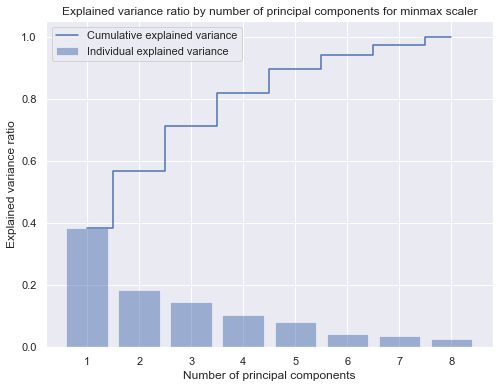

<Figure size 432x288 with 0 Axes>

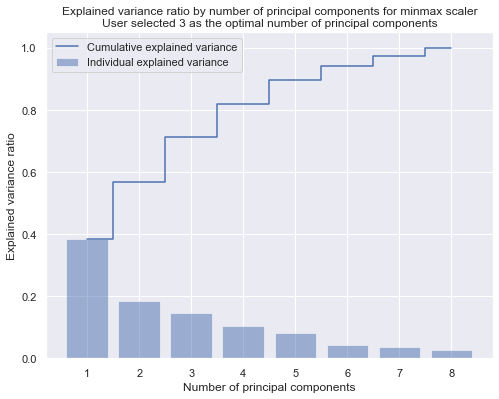

KMeans(n_clusters=2, n_init=10, random_state=42)

KMeans(n_clusters=3, n_init=10, random_state=42)

KMeans(n_clusters=4, n_init=10, random_state=42)

KMeans(n_clusters=5, n_init=10, random_state=42)

KMeans(n_clusters=6, n_init=10, random_state=42)

KMeans(n_clusters=7, n_init=10, random_state=42)

KMeans(n_init=10, random_state=42)

KMeans(n_clusters=9, n_init=10, random_state=42)

KMeans(n_clusters=10, n_init=10, random_state=42)

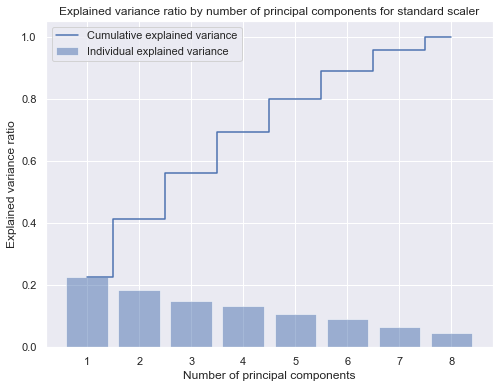

<Figure size 432x288 with 0 Axes>

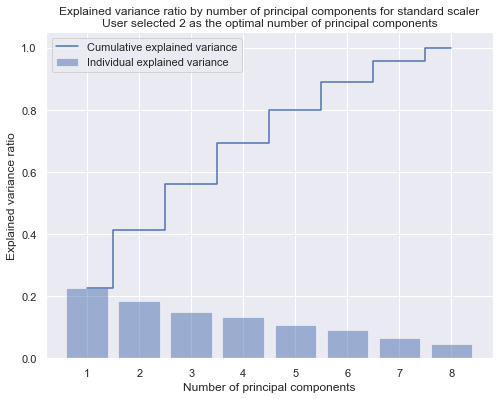

KMeans(n_clusters=2, n_init=10, random_state=42)

KMeans(n_clusters=3, n_init=10, random_state=42)

KMeans(n_clusters=4, n_init=10, random_state=42)

KMeans(n_clusters=5, n_init=10, random_state=42)

KMeans(n_clusters=6, n_init=10, random_state=42)

KMeans(n_clusters=7, n_init=10, random_state=42)

KMeans(n_init=10, random_state=42)

KMeans(n_clusters=9, n_init=10, random_state=42)

KMeans(n_clusters=10, n_init=10, random_state=42)

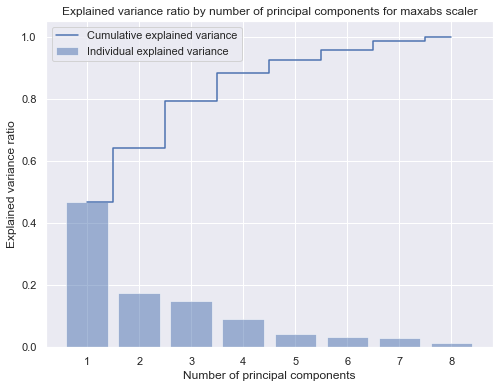

<Figure size 432x288 with 0 Axes>

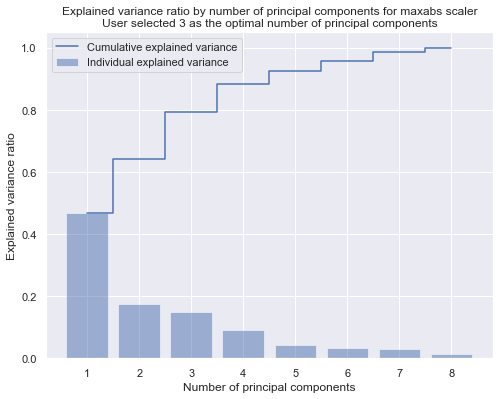

KMeans(n_clusters=2, n_init=10, random_state=42)

KMeans(n_clusters=3, n_init=10, random_state=42)

KMeans(n_clusters=4, n_init=10, random_state=42)

KMeans(n_clusters=5, n_init=10, random_state=42)

KMeans(n_clusters=6, n_init=10, random_state=42)

KMeans(n_clusters=7, n_init=10, random_state=42)

KMeans(n_init=10, random_state=42)

KMeans(n_clusters=9, n_init=10, random_state=42)

KMeans(n_clusters=10, n_init=10, random_state=42)

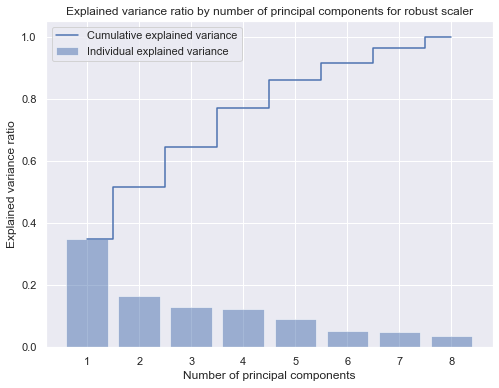

<Figure size 432x288 with 0 Axes>

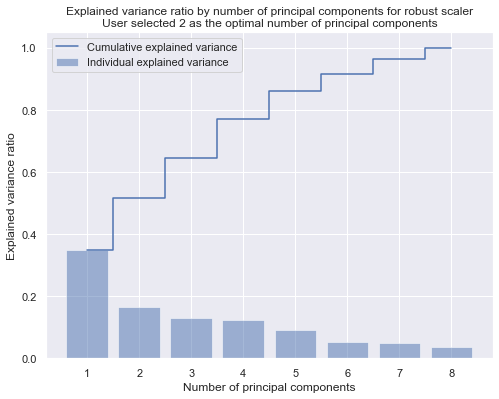

KMeans(n_clusters=2, n_init=10, random_state=42)

KMeans(n_clusters=3, n_init=10, random_state=42)

KMeans(n_clusters=4, n_init=10, random_state=42)

KMeans(n_clusters=5, n_init=10, random_state=42)

KMeans(n_clusters=6, n_init=10, random_state=42)

KMeans(n_clusters=7, n_init=10, random_state=42)

KMeans(n_init=10, random_state=42)

KMeans(n_clusters=9, n_init=10, random_state=42)

KMeans(n_clusters=10, n_init=10, random_state=42)

Text(0.5, 0, 'Number of Clusters (k)')

Text(0, 0.5, 'Silhouette Score')

Text(0, 0.5, 'Inertia')

Text(0.5, 1.0, 'minmax\nOptimal PCA n_components = 3')

Text(0.5, 0, 'Number of Clusters (k)')

Text(0, 0.5, 'Silhouette Score')

Text(0, 0.5, 'Inertia')

Text(0.5, 1.0, 'standard\nOptimal PCA n_components = 2')

Text(0.5, 0, 'Number of Clusters (k)')

Text(0, 0.5, 'Silhouette Score')

Text(0, 0.5, 'Inertia')

Text(0.5, 1.0, 'maxabs\nOptimal PCA n_components = 3')

Text(0.5, 0, 'Number of Clusters (k)')

Text(0, 0.5, 'Silhouette Score')

Text(0, 0.5, 'Inertia')

Text(0.5, 1.0, 'robust\nOptimal PCA n_components = 2')

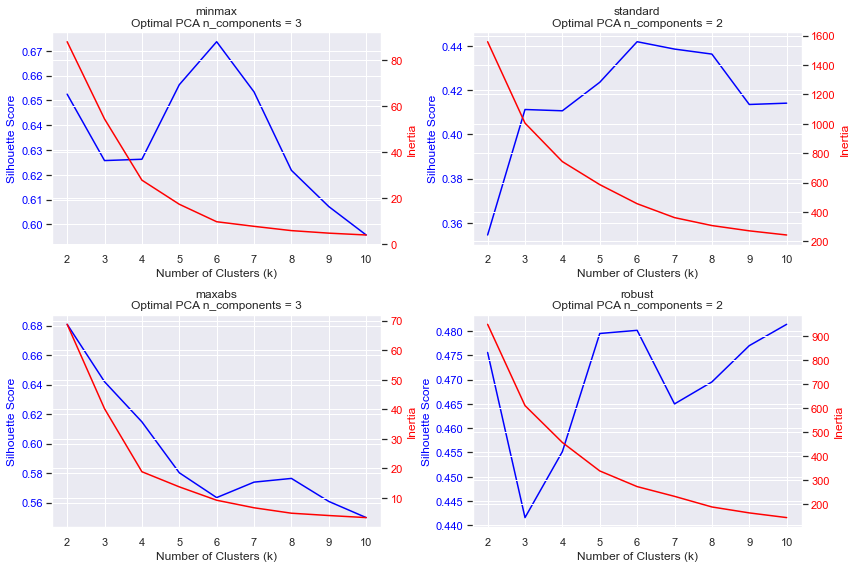

KMeans(n_clusters=3, n_init=10, random_state=42)

/var/folders/2z/xnw84j3s6677slw3jh12jk_c0000gp/T/ipykernel_57769/1508935543.py:254: UserWarning:

The palette list has more values (13) than needed (3), which may not be intended.



<AxesSubplot:>

Text(0.5, 0, 'PC1')

Text(0, 0.5, 'PC2')

Text(0.5, 1.0, 'minmax\nOptimal PCA n_components = 3\nNumber of Clusters = 3')

KMeans(n_clusters=3, n_init=10, random_state=42)

/var/folders/2z/xnw84j3s6677slw3jh12jk_c0000gp/T/ipykernel_57769/1508935543.py:254: UserWarning:

The palette list has more values (13) than needed (3), which may not be intended.



<AxesSubplot:>

Text(0.5, 0, 'PC1')

Text(0, 0.5, 'PC2')

Text(0.5, 1.0, 'standard\nOptimal PCA n_components = 2\nNumber of Clusters = 3')

KMeans(n_clusters=3, n_init=10, random_state=42)

/var/folders/2z/xnw84j3s6677slw3jh12jk_c0000gp/T/ipykernel_57769/1508935543.py:254: UserWarning:

The palette list has more values (13) than needed (3), which may not be intended.



<AxesSubplot:>

Text(0.5, 0, 'PC1')

Text(0, 0.5, 'PC2')

Text(0.5, 1.0, 'maxabs\nOptimal PCA n_components = 3\nNumber of Clusters = 3')

KMeans(n_clusters=5, n_init=10, random_state=42)

/var/folders/2z/xnw84j3s6677slw3jh12jk_c0000gp/T/ipykernel_57769/1508935543.py:254: UserWarning:

The palette list has more values (13) than needed (5), which may not be intended.



<AxesSubplot:>

Text(0.5, 0, 'PC1')

Text(0, 0.5, 'PC2')

Text(0.5, 1.0, 'robust\nOptimal PCA n_components = 2\nNumber of Clusters = 5')

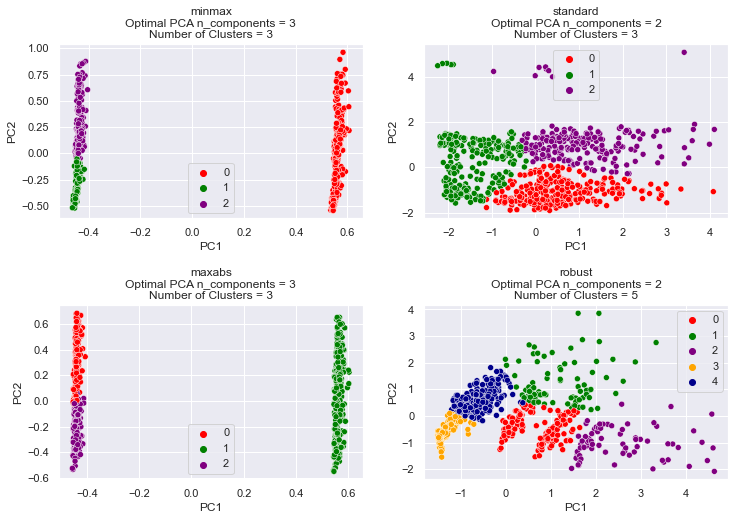

In [271]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler, StandardScaler, MaxAbsScaler, RobustScaler
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt


def optimal_PCA_n_components(X, scaler_name):
    """
    Plots the cumulative explained variance and individual explained variance
    bar chart to help determine the optimal number of principal components to use
    in PCA.

    Returns:
        optimal_n_components (int): the number of principal components to use
            in PCA.
    """
    # Define different numbers of components to try
    n_components = range(1, X.shape[1]+1)

    # Initialize empty lists to store the explained variances
    cum_explained_variances = []
    individual_explained_variances = []

    # Loop through different numbers of components
    for n in n_components:

        # Initialize PCA with n components
        pca = PCA(n_components=n)

        # Fit PCA to the data
        pca.fit(X)

        # Get the explained variances
        cum_explained_variances.append(np.sum(pca.explained_variance_ratio_))
        individual_explained_variances.append(pca.explained_variance_ratio_[-1])

    # Plot the variance explained by each principal component
    plt.figure(figsize=(8, 6))

    # Plot the individual explained variance as bars
    plt.bar(n_components, individual_explained_variances, alpha=0.5,
            align='center', label='Individual explained variance')

    # Plot the cumulative explained variance as a stair line
    plt.step(n_components, cum_explained_variances,
             where='mid', label='Cumulative explained variance')

    plt.xlabel('Number of principal components')
    plt.ylabel('Explained variance ratio')
    plt.title(f'Explained variance ratio by number of principal components for {scaler_name} scaler')
    plt.legend(loc='best')
    plt.show()

    if interactive_switch == "On":
        # Get user input for the desired number of principal components to use
        optimal_n_components = 0
        while optimal_n_components < 2:
            optimal_n_components = int(input("Enter the desired number (>=2) of principal components to use: "))
            if optimal_n_components < 2:
                print("Input must be greater than 1")
    elif interactive_switch == "Off":
        # Set the optimal number of principal components to use
        if scaler_name == "minmax" or scaler_name == "maxabs":
            optimal_n_components = 3
        elif scaler_name == "standard" or scaler_name == "robust":
            optimal_n_components = 2
    
    # Plot the variance explained by each principal component
    plt.clf()
    plt.figure(figsize=(8, 6))

    # Plot the individual explained variance as bars
    plt.bar(n_components, individual_explained_variances, alpha=0.5,
            align='center', label='Individual explained variance')

    # Plot the cumulative explained variance as a stair line
    plt.step(n_components, cum_explained_variances,
             where='mid', label='Cumulative explained variance')

    plt.xlabel('Number of principal components')
    plt.ylabel('Explained variance ratio')
    plt.title(f'Explained variance ratio by number of principal components for {scaler_name} scaler\nUser selected {optimal_n_components} as the optimal number of principal components')
    plt.legend(loc='best')
    # plt.show()

    plt.savefig(f'data/generated_PX/optimal_n_components_{scaler_name}.png', dpi=300, facecolor='white')
    plt.show();

    return optimal_n_components

# Load the dataset

# Select relevant columns for clustering
X = twm_customer_wrk2[selected_columns]

# Define different scalers
scalers = {'minmax': MinMaxScaler(), 
           'standard': StandardScaler(), 
           'maxabs': MaxAbsScaler(), 
           'robust': RobustScaler()}

# Initialize empty dictionary to store results for different scalers
results = {}

# Initialize empty dictionary to store PCA-contributing features
pca_contributing_features = {}

# Loop through different scalers
optimal_n_components_by_scaler_dict = {}
optimal_k_by_scaler_dict = {}

# Loop through different scalers
for scaler_name, scaler in scalers.items():
    
    # Scale the data
    X_scaled = scaler.fit_transform(X)
    
    # ====  Determine the optimal number of principal components to use in PCA =====
    # Determine the optimal number of principal components to use in PCA
    optimal_n_components = optimal_PCA_n_components(X_scaled, scaler_name)
    optimal_n_components_by_scaler_dict[scaler_name] = optimal_n_components
    
    # Initialize PCA with the optimal number of components
    pca = PCA(n_components=optimal_n_components)
    # ==============================================================================
    
    # Initialize PCA with 2 components
    pca = PCA(n_components=2)
    
    # Fit PCA to the scaled data
    X_pca = pca.fit_transform(X_scaled)
    
    # Initialize empty lists to store silhouette scores and inertias
    silhouette_scores = []
    inertias = []
    
    # ======================== Contributive Features================================
    # Get the PCA components
    components = pca.components_
    
    # Get the features with the highest contribution to PC1 and PC2
    pc1_features = [(X.columns[i], round(abs(components[0][i])*100, 2)) for i in range(len(X.columns))]
    pc1_features.sort(key=lambda x: x[1], reverse=True)
    pc1_top3 = pc1_features[:3]
    
    pc2_features = [(X.columns[i], round(abs(components[1][i])*100, 2)) for i in range(len(X.columns))]
    pc2_features.sort(key=lambda x: x[1], reverse=True)
    pc2_top3 = pc2_features[:3]
    
    # Store the top 3 contributing features for the current scaler
    pca_contributing_features[scaler_name] = {'PC1': pc1_top3, 'PC2': pc2_top3}
    
    # components[0][i] means the ith feature's contribution to PC1
    # components[1][i] means the ith feature's contribution to PC2
    # =============================================================================
    
    # Loop through different numbers of clusters
    for k in range(2, 11):
        
        # Initialize KMeans with k clusters
        kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
        
        # Fit KMeans to the PCA-transformed data
        kmeans.fit(X_pca)
        
        # Calculate silhouette score and inertia
        silhouette_scores.append(silhouette_score(X_pca, kmeans.labels_))
        inertias.append(kmeans.inertia_)
        
    # Store the results for the current scaler in the dictionary
    results[scaler_name] = {'silhouette_scores': silhouette_scores, 'inertias': inertias}



# Get the default figure size
default_size = plt.rcParams['figure.figsize']

# Set the figure size as twice the height of the default size
figsize = (default_size[0]*2, default_size[1] * 2)
    
# Plot the results for each scaler
fig, axs = plt.subplots(2, 2, figsize=figsize)

for i, (scaler_name, result) in enumerate(results.items()):
    ax = axs[i // 2][i % 2]
    ax.plot(range(2, 11), result['silhouette_scores'], label='Silhouette Score', color='blue')
    ax.set_xlabel('Number of Clusters (k)')
    ax.set_ylabel('Silhouette Score', color='blue')
    ax.tick_params(axis='y', labelcolor='blue')
    ax2 = ax.twinx()
    ax2.plot(range(2, 11), result['inertias'], label='Inertia', color='red')
    ax2.set_ylabel('Inertia', color='red')
    ax2.tick_params(axis='y', labelcolor='red')
    ax.set_title(f'{scaler_name}\nOptimal PCA n_components = {optimal_n_components_by_scaler_dict[scaler_name]}')

plt.tight_layout()
plt.savefig('data/generated_PX/silhouette_elbow_by_scalers.png', dpi=300, facecolor='white')
plt.show()

# # Based on the elbow method and silhouette score, set k = 4 and use the optimal scaler
# num_clusters = 4

if interactive_switch == 'On':
# Prompt user for cluster numbers
    while True:
        try:
            cluster_nums_str = input("Enter four integer values separated by commas for the number of clusters for each scaler (minmax/standard/maxabs/robust): ")
            cluster_nums = [int(num.strip()) for num in cluster_nums_str.split(',')]
            if len(cluster_nums) != 4:
                raise ValueError
            break
        except ValueError:
            print("Please enter exactly four comma-separated integers")
elif interactive_switch == 'Off':
    cluster_nums = [3,3,3,5]
    
# # Create a new figure with the specified size
# fig, ax = plt.subplots(figsize=figsize)

colors = ['red', 'green', 'purple', 'orange', 'darkblue', 'darkgreen', 'cadetblue', 'lightgreen', 'gray', 'black', 'lightgray', 'lightblue', 'darkred'] # lightred is not visible

# Initialize subplots for each scaler
fig, axs = plt.subplots(2, 2, figsize=figsize)
fig.subplots_adjust(hspace=0.5)

# Initialize a dictionary to store the cluster labels
labels_by_scaler = {}

# Loop through different scalers
for i, (scaler_name, scaler) in enumerate(scalers.items()):
    num_clusters = cluster_nums[i]
    # Scale the data
    X_scaled = scaler.fit_transform(X)
    
    # Initialize PCA with 2 components
    pca = PCA(n_components= optimal_n_components_by_scaler_dict[scaler_name])
    
    # Fit PCA to the scaled data
    X_pca = pca.fit_transform(X_scaled)
    
    # Initialize KMeans with k clusters
    kmeans = KMeans(n_clusters=num_clusters, random_state=42, n_init=10)
    
    # Fit KMeans to the PCA-transformed data
    kmeans.fit(X_pca)
    
    # Get the cluster labels
    labels = kmeans.labels_
    
    # Plot the clusters on PC1 and PC2 using Seaborn
    sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=labels, palette=colors, ax=axs[i//2, i%2])
    axs[i//2, i%2].set_xlabel('PC1')
    axs[i//2, i%2].set_ylabel('PC2')
    axs[i//2, i%2].set_title(f'{scaler_name}\nOptimal PCA n_components = {optimal_n_components_by_scaler_dict[scaler_name]}\nNumber of Clusters = {num_clusters}')
    labels_by_scaler[scaler_name] = labels
    
# Save the subplots as PNG files
plt.savefig('data/generated_PX/kmeans_PC1_PC2_by_scalers.png', dpi=300, facecolor='white')



    
    


In [272]:
from tabulate import tabulate

# Print the results
table_data = []
for scaler_name, features in pca_contributing_features.items():
    table_data.append([scaler_name, f"{features['PC1'][0][0]} ({features['PC1'][0][1]}%)", 
                       f"{features['PC1'][1][0]} ({features['PC1'][1][1]}%)",
                       f"{features['PC1'][2][0]} ({features['PC1'][2][1]}%)",
                       f"{features['PC2'][0][0]} ({features['PC2'][0][1]}%)",
                       f"{features['PC2'][1][0]} ({features['PC2'][1][1]}%)",
                       f"{features['PC2'][2][0]} ({features['PC2'][2][1]}%)"])

headers = ["Scaler Name", "PC1 (1st)", "PC1 (2nd)", "PC1 (3rd)", "PC2 (1st)", "PC2 (2nd)", "PC2 (3rd)"]
print(tabulate(table_data, headers=headers, tablefmt="grid"))

+---------------+------------------------------+------------------------------+----------------------------+-------------------------------+-------------------+------------------------------+
| Scaler Name   | PC1 (1st)                    | PC1 (2nd)                    | PC1 (3rd)                  | PC2 (1st)                     | PC2 (2nd)         | PC2 (3rd)                    |
+===============+==============================+==============================+============================+===============================+===================+==============================+
| minmax        | gender_indicator (99.84%)    | CUST_income (5.15%)          | longitude (1.49%)          | CUST_marital_status (80.12%)  | CUST_age (41.74%) | CUST_nbr_children (36.14%)   |
+---------------+------------------------------+------------------------------+----------------------------+-------------------------------+-------------------+------------------------------+
| standard      | CUST_marital_status (5

In [273]:
# Print the results as markdown table
print("| Scaler Name | <span style='color:#FFD700'>PC1</span> Feature 1 | <span style='color:#FFD700'>PC1</span> Feature 2 | <span style='color:#FFD700'>PC1</span> Feature 3 | <span style='color:#90EE90'>PC2</span> Feature 1 | <span style='color:#90EE90'>PC2</span> Feature 2 | <span style='color:#90EE90'>PC2</span> Feature 3 |")
print("| --- | --- | --- | --- | --- | --- | --- |")

for scaler_name, features in pca_contributing_features.items():
    pc1_features = features['PC1'][:3]
    pc2_features = features['PC2'][:3]
    
    # Build row for current scaler
    row = [scaler_name]
    for feature in pc1_features:
        row.append(f"{feature[0]} ({feature[1]}%)")
    for feature in pc2_features:
        row.append(f"{feature[0]} ({feature[1]}%)")
    
    # Print row as markdown table row
    print("| " + " | ".join(row) + " |")


| Scaler Name | <span style='color:#FFD700'>PC1</span> Feature 1 | <span style='color:#FFD700'>PC1</span> Feature 2 | <span style='color:#FFD700'>PC1</span> Feature 3 | <span style='color:#90EE90'>PC2</span> Feature 1 | <span style='color:#90EE90'>PC2</span> Feature 2 | <span style='color:#90EE90'>PC2</span> Feature 3 |
| --- | --- | --- | --- | --- | --- | --- |
| minmax | gender_indicator (99.84%) | CUST_income (5.15%) | longitude (1.49%) | CUST_marital_status (80.12%) | CUST_age (41.74%) | CUST_nbr_children (36.14%) |
| standard | CUST_marital_status (59.59%) | CUST_income (49.1%) | CUST_nbr_children (48.92%) | longitude (69.72%) | latitude (66.89%) | CUST_age (18.05%) |
| maxabs | gender_indicator (99.86%) | CUST_income (5.1%) | CUST_nbr_children (0.78%) | CUST_years_with_bank (94.53%) | CUST_age (29.23%) | CUST_marital_status (12.02%) |
| robust | CUST_nbr_children (75.14%) | CUST_marital_status (51.29%) | CUST_income (39.92%) | CUST_income (64.37%) | CUST_age (50.44%) | CUST_nbr_

| Scaler Name | <span style='color:#FFD700'>PC1</span> Feature 1 | <span style='color:#FFD700'>PC1</span> Feature 2 | <span style='color:#FFD700'>PC1</span> Feature 3 | <span style='color:#90EE90'>PC2</span> Feature 1 | <span style='color:#90EE90'>PC2</span> Feature 2 | <span style='color:#90EE90'>PC2</span> Feature 3 |
| --- | --- | --- | --- | --- | --- | --- |
| minmax | CUST_marital_status (85.87%) | CUST_nbr_children (48.15%) | CUST_income (16.91%) | longitude (80.92%) | latitude (57.82%) | CUST_marital_status (7.53%) |
| standard | CUST_nbr_children (62.7%) | CUST_marital_status (60.54%) | CUST_income (46.9%) | longitude (70.14%) | latitude (69.26%) | CUST_income (13.88%) |
| maxabs | CUST_marital_status (69.04%) | CUST_nbr_children (68.26%) | CUST_income (23.82%) | CUST_marital_status (71.5%) | CUST_nbr_children (67.42%) | CUST_income (12.64%) |
| robust | CUST_nbr_children (77.09%) | CUST_marital_status (50.37%) | CUST_income (38.88%) | CUST_income (90.44%) | CUST_nbr_children (35.95%) | longitude (14.86%) |

## Radar Chart subplots

In [274]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.io as pio

# define the categories
categories = ['CUST_income', 'CUST_age', 'CUST_years_with_bank', 'CUST_nbr_children', 'CUST_marital_status']

scalers = {
    'minmax': MinMaxScaler(),
    'standard': StandardScaler(),
    'maxabs': MaxAbsScaler(),
    'robust': RobustScaler()
}

for scaler_name, labels in labels_by_scaler.items():
    twm_customer_wrk2_for_radar = twm_customer_wrk2.copy()

    twm_customer_wrk2_for_radar = twm_customer_wrk2_for_radar[categories]

    # using the scaler_name to apply the scaler
    scaler = scalers[scaler_name]
    twm_customer_wrk2_for_radar_scaled = scaler.fit_transform(twm_customer_wrk2_for_radar)

    # find the number of clusters
    num_of_clusters = len(np.unique(labels))

    # create a new column with the cluster labels
    twm_customer_wrk2_for_radar_scaled = pd.DataFrame(twm_customer_wrk2_for_radar_scaled, columns=twm_customer_wrk2_for_radar.columns)
    twm_customer_wrk2_for_radar_scaled['label'] = pd.Series(labels, dtype=int)

    # group by label and find the mean
    twm_customer_wrk2_for_radar_scaled_pivot = twm_customer_wrk2_for_radar_scaled.groupby('label').mean()

    # get the number of clusters
    num_clusters = twm_customer_wrk2_for_radar_scaled_pivot.shape[0]
    
    # min and max of all value in twm_customer_wrk2_for_radar_pivot
    radar_min = twm_customer_wrk2_for_radar_scaled_pivot.min().min()
    radar_max = twm_customer_wrk2_for_radar_scaled_pivot.max().max()
    
    # create a subplot for each cluster
    fig = make_subplots(rows=1, cols=num_clusters, subplot_titles=[f'Cluster {i}' for i in range(num_clusters)],
                        specs=[[{'type': 'polar'}] * num_clusters])

    # loop through the clusters and add a trace to each subplot
    for i in range(num_clusters):
        fig.add_trace(go.Scatterpolar(
            r=twm_customer_wrk2_for_radar_scaled_pivot.iloc[i].tolist(),
            theta=categories,
            fill='toself',
            name=f'Cluster {i}'
        ), row=1, col=i+1)

        # set the layout of the subplot
        fig.update_layout(
            polar=dict(
                radialaxis=dict(
                    visible=True,
                    range=[radar_min, radar_max]
                )),
            showlegend=False
        )

    # set the title of the figure
    fig.update_layout(title=f'Radar Chart - {scaler_name.capitalize()}')

    # save the figure as PNG
    fig.write_image(f'data/generated_PX/radar_{scaler_name}.png', width=1200, height=600, scale=2)


# DBSCAN version 1

In [275]:

# This the real selected columns
# selected_columns = ['CUST_income', 'CUST_nbr_children', 'CUST_marital_status', 'latitude', 'longitude']

# This is the fake selected columns
# unselected columns, to be commented out
selected_columns = ['CUST_income', 'CUST_age', 'CUST_years_with_bank', 'CUST_nbr_children', 'CUST_marital_status', 'latitude', 'longitude', 'gender_indicator'] # unselected columns



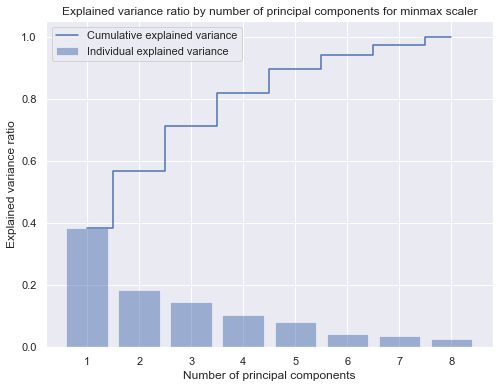

<Figure size 432x288 with 0 Axes>

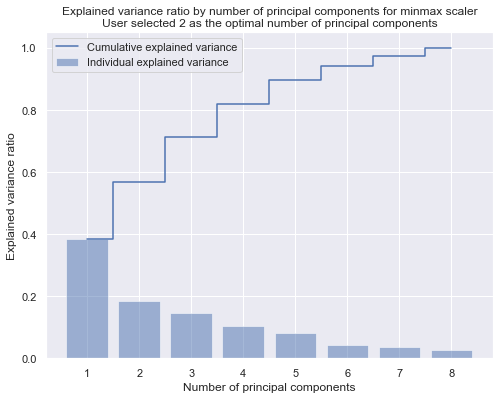

KMeans(n_clusters=2, n_init=10, random_state=42)

KMeans(n_clusters=3, n_init=10, random_state=42)

KMeans(n_clusters=4, n_init=10, random_state=42)

KMeans(n_clusters=5, n_init=10, random_state=42)

KMeans(n_clusters=6, n_init=10, random_state=42)

KMeans(n_clusters=7, n_init=10, random_state=42)

KMeans(n_init=10, random_state=42)

KMeans(n_clusters=9, n_init=10, random_state=42)

KMeans(n_clusters=10, n_init=10, random_state=42)

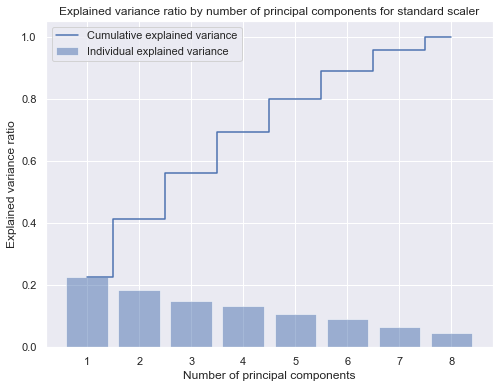

<Figure size 432x288 with 0 Axes>

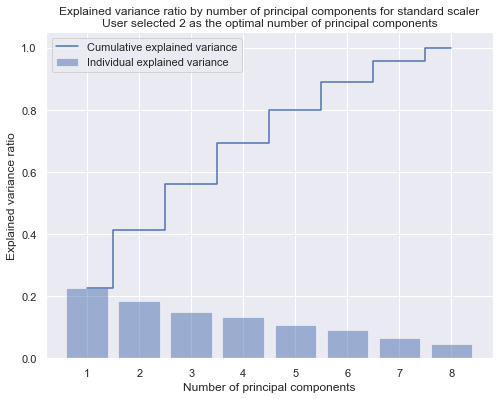

KMeans(n_clusters=2, n_init=10, random_state=42)

KMeans(n_clusters=3, n_init=10, random_state=42)

KMeans(n_clusters=4, n_init=10, random_state=42)

KMeans(n_clusters=5, n_init=10, random_state=42)

KMeans(n_clusters=6, n_init=10, random_state=42)

KMeans(n_clusters=7, n_init=10, random_state=42)

KMeans(n_init=10, random_state=42)

KMeans(n_clusters=9, n_init=10, random_state=42)

KMeans(n_clusters=10, n_init=10, random_state=42)

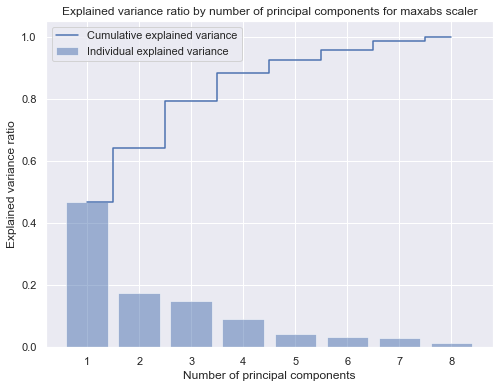

<Figure size 432x288 with 0 Axes>

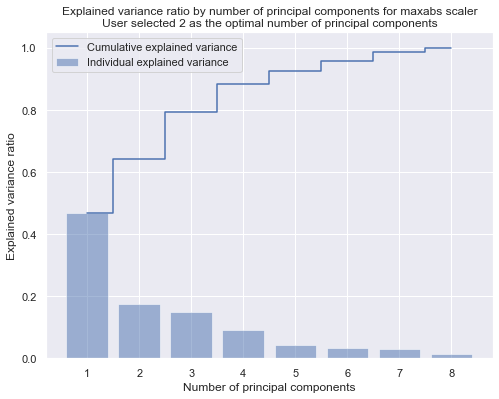

KMeans(n_clusters=2, n_init=10, random_state=42)

KMeans(n_clusters=3, n_init=10, random_state=42)

KMeans(n_clusters=4, n_init=10, random_state=42)

KMeans(n_clusters=5, n_init=10, random_state=42)

KMeans(n_clusters=6, n_init=10, random_state=42)

KMeans(n_clusters=7, n_init=10, random_state=42)

KMeans(n_init=10, random_state=42)

KMeans(n_clusters=9, n_init=10, random_state=42)

KMeans(n_clusters=10, n_init=10, random_state=42)

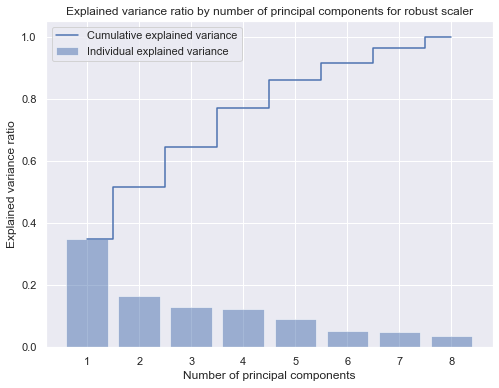

<Figure size 432x288 with 0 Axes>

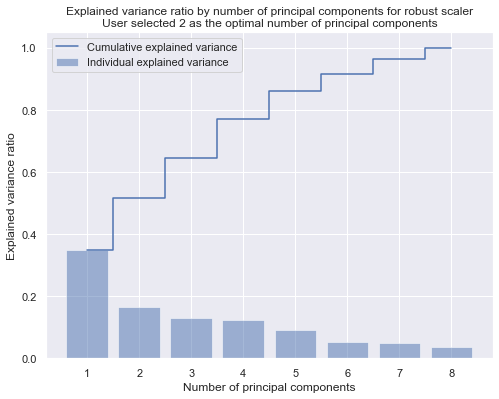

KMeans(n_clusters=2, n_init=10, random_state=42)

KMeans(n_clusters=3, n_init=10, random_state=42)

KMeans(n_clusters=4, n_init=10, random_state=42)

KMeans(n_clusters=5, n_init=10, random_state=42)

KMeans(n_clusters=6, n_init=10, random_state=42)

KMeans(n_clusters=7, n_init=10, random_state=42)

KMeans(n_init=10, random_state=42)

KMeans(n_clusters=9, n_init=10, random_state=42)

KMeans(n_clusters=10, n_init=10, random_state=42)

Text(0.5, 0, 'Number of Clusters (k)')

Text(0, 0.5, 'Silhouette Score')

Text(0, 0.5, 'Inertia')

Text(0.5, 1.0, 'minmax\nOptimal PCA n_components = 2')

Text(0.5, 0, 'Number of Clusters (k)')

Text(0, 0.5, 'Silhouette Score')

Text(0, 0.5, 'Inertia')

Text(0.5, 1.0, 'standard\nOptimal PCA n_components = 2')

Text(0.5, 0, 'Number of Clusters (k)')

Text(0, 0.5, 'Silhouette Score')

Text(0, 0.5, 'Inertia')

Text(0.5, 1.0, 'maxabs\nOptimal PCA n_components = 2')

Text(0.5, 0, 'Number of Clusters (k)')

Text(0, 0.5, 'Silhouette Score')

Text(0, 0.5, 'Inertia')

Text(0.5, 1.0, 'robust\nOptimal PCA n_components = 2')

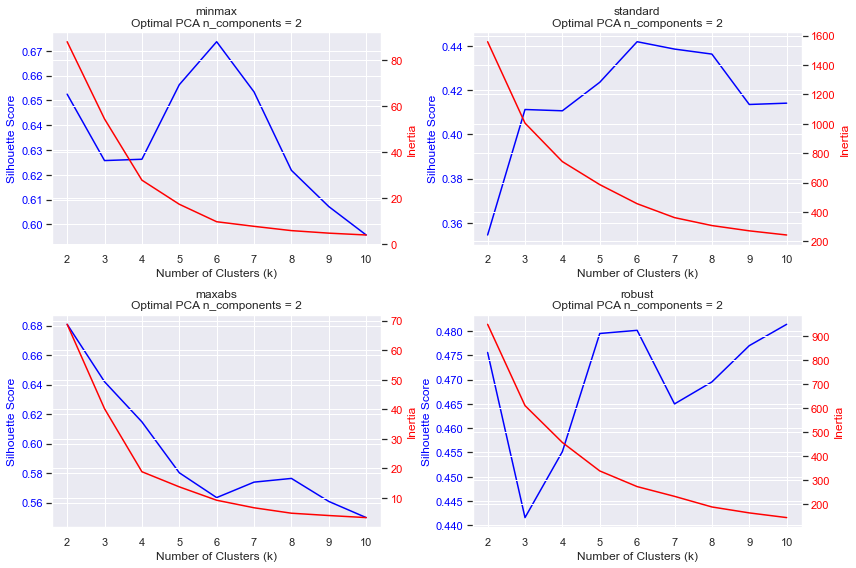

In [276]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler, StandardScaler, MaxAbsScaler, RobustScaler
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt


def optimal_PCA_n_components(X, scaler_name):
    """
    Plots the cumulative explained variance and individual explained variance
    bar chart to help determine the optimal number of principal components to use
    in PCA.

    Returns:
        optimal_n_components (int): the number of principal components to use
            in PCA.
    """
    # Define different numbers of components to try
    n_components = range(1, X.shape[1]+1)

    # Initialize empty lists to store the explained variances
    cum_explained_variances = []
    individual_explained_variances = []

    # Loop through different numbers of components
    for n in n_components:

        # Initialize PCA with n components
        pca = PCA(n_components=n)

        # Fit PCA to the data
        pca.fit(X)

        # Get the explained variances
        cum_explained_variances.append(np.sum(pca.explained_variance_ratio_))
        individual_explained_variances.append(pca.explained_variance_ratio_[-1])

    # Plot the variance explained by each principal component
    plt.figure(figsize=(8, 6))

    # Plot the individual explained variance as bars
    plt.bar(n_components, individual_explained_variances, alpha=0.5,
            align='center', label='Individual explained variance')

    # Plot the cumulative explained variance as a stair line
    plt.step(n_components, cum_explained_variances,
             where='mid', label='Cumulative explained variance')

    plt.xlabel('Number of principal components')
    plt.ylabel('Explained variance ratio')
    plt.title(f'Explained variance ratio by number of principal components for {scaler_name} scaler')
    plt.legend(loc='best')
    plt.show()

    if interactive_switch == "On":
        # Get user input for the desired number of principal components to use
        optimal_n_components = 0
        while optimal_n_components < 2:
            optimal_n_components = int(input("Enter the desired number (>=2) of principal components to use: "))
            if optimal_n_components < 2:
                print("Input must be greater than 1")
    elif interactive_switch == "Off":
        # Set the optimal number of principal components to use
        if scaler_name == "minmax" or scaler_name == "maxabs":
            optimal_n_components = 2
        elif scaler_name == "standard" or scaler_name == "robust":
            optimal_n_components = 2
    
    # Plot the variance explained by each principal component
    plt.clf()
    plt.figure(figsize=(8, 6))

    # Plot the individual explained variance as bars
    plt.bar(n_components, individual_explained_variances, alpha=0.5,
            align='center', label='Individual explained variance')

    # Plot the cumulative explained variance as a stair line
    plt.step(n_components, cum_explained_variances,
             where='mid', label='Cumulative explained variance')

    plt.xlabel('Number of principal components')
    plt.ylabel('Explained variance ratio')
    plt.title(f'Explained variance ratio by number of principal components for {scaler_name} scaler\nUser selected {optimal_n_components} as the optimal number of principal components')
    plt.legend(loc='best')
    # plt.show()

    plt.savefig(f'data/generated_PX/optimal_n_components_{scaler_name}.png', dpi=300, facecolor='white')
    plt.show();

    return optimal_n_components

# Load the dataset

# Select relevant columns for clustering
X = twm_customer_wrk2[selected_columns]

# Define different scalers
scalers = {'minmax': MinMaxScaler(), 
           'standard': StandardScaler(), 
           'maxabs': MaxAbsScaler(), 
           'robust': RobustScaler()}

# Initialize empty dictionary to store results for different scalers
results = {}

# Initialize empty dictionary to store PCA-contributing features
pca_contributing_features = {}

# Loop through different scalers
optimal_n_components_by_scaler_dict = {}
optimal_k_by_scaler_dict = {}

# Loop through different scalers
for scaler_name, scaler in scalers.items():
    
    # Scale the data
    X_scaled = scaler.fit_transform(X)
    
    # ====  Determine the optimal number of principal components to use in PCA =====
    # Determine the optimal number of principal components to use in PCA
    optimal_n_components = optimal_PCA_n_components(X_scaled, scaler_name)
    optimal_n_components_by_scaler_dict[scaler_name] = optimal_n_components
    
    # Initialize PCA with the optimal number of components
    pca = PCA(n_components=optimal_n_components)
    # ==============================================================================
    
    # Initialize PCA with 2 components
    pca = PCA(n_components=2)
    
    # Fit PCA to the scaled data
    X_pca = pca.fit_transform(X_scaled)
    
    # Initialize empty lists to store silhouette scores and inertias
    silhouette_scores = []
    inertias = []
    
    # ======================== Contributive Features================================
    # Get the PCA components
    components = pca.components_
    
    # Get the features with the highest contribution to PC1 and PC2
    pc1_features = [(X.columns[i], round(abs(components[0][i])*100, 2)) for i in range(len(X.columns))]
    pc1_features.sort(key=lambda x: x[1], reverse=True)
    pc1_top3 = pc1_features[:3]
    
    pc2_features = [(X.columns[i], round(abs(components[1][i])*100, 2)) for i in range(len(X.columns))]
    pc2_features.sort(key=lambda x: x[1], reverse=True)
    pc2_top3 = pc2_features[:3]
    
    # Store the top 3 contributing features for the current scaler
    pca_contributing_features[scaler_name] = {'PC1': pc1_top3, 'PC2': pc2_top3}
    
    # components[0][i] means the ith feature's contribution to PC1
    # components[1][i] means the ith feature's contribution to PC2
    # =============================================================================
    
    # Loop through different numbers of clusters
    for k in range(2, 11):
        
        # Initialize KMeans with k clusters
        kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
        
        # Fit KMeans to the PCA-transformed data
        kmeans.fit(X_pca)
        
        # Calculate silhouette score and inertia
        silhouette_scores.append(silhouette_score(X_pca, kmeans.labels_))
        inertias.append(kmeans.inertia_)
        
    # Store the results for the current scaler in the dictionary
    results[scaler_name] = {'silhouette_scores': silhouette_scores, 'inertias': inertias}



# Get the default figure size
default_size = plt.rcParams['figure.figsize']

# Set the figure size as twice the height of the default size
figsize = (default_size[0]*2, default_size[1] * 2)
    
# Plot the results for each scaler
fig, axs = plt.subplots(2, 2, figsize=figsize)

for i, (scaler_name, result) in enumerate(results.items()):
    ax = axs[i // 2][i % 2]
    ax.plot(range(2, 11), result['silhouette_scores'], label='Silhouette Score', color='blue')
    ax.set_xlabel('Number of Clusters (k)')
    ax.set_ylabel('Silhouette Score', color='blue')
    ax.tick_params(axis='y', labelcolor='blue')
    ax2 = ax.twinx()
    ax2.plot(range(2, 11), result['inertias'], label='Inertia', color='red')
    ax2.set_ylabel('Inertia', color='red')
    ax2.tick_params(axis='y', labelcolor='red')
    ax.set_title(f'{scaler_name}\nOptimal PCA n_components = {optimal_n_components_by_scaler_dict[scaler_name]}')

plt.tight_layout()
plt.savefig('data/generated_PX/silhouette_elbow_by_scalers.png', dpi=300, facecolor='white')
plt.show()

# # Based on the elbow method and silhouette score, set k = 4 and use the optimal scaler
# num_clusters = 4

if interactive_switch == 'On':
# Prompt user for cluster numbers
    while True:
        try:
            cluster_nums_str = input("Enter four integer values separated by commas for the number of clusters for each scaler (minmax/standard/maxabs/robust): ")
            cluster_nums = [int(num.strip()) for num in cluster_nums_str.split(',')]
            if len(cluster_nums) != 4:
                raise ValueError
            break
        except ValueError:
            print("Please enter exactly four comma-separated integers")
elif interactive_switch == 'Off':
    cluster_nums = [3,3,3,5]


## Test different DBSCAN(eps=0.5, min_samples=5) parameters

DBSCAN(eps=0.21, min_samples=3)

/var/folders/2z/xnw84j3s6677slw3jh12jk_c0000gp/T/ipykernel_57769/2564841289.py:56: UserWarning:

The palette list has more values (13) than needed (2), which may not be intended.



<AxesSubplot:>

Text(0.5, 0, 'PC1')

Text(0, 0.5, 'PC2')

Text(0.5, 1.0, 'minmax\nOptimal PCA n_components = 2\nDBSCAN eps = 0.21, min_samples = 3')

DBSCAN(eps=0.21, min_samples=3)

/var/folders/2z/xnw84j3s6677slw3jh12jk_c0000gp/T/ipykernel_57769/2564841289.py:56: UserWarning:


The palette list has fewer values (13) than needed (16) and will cycle, which may produce an uninterpretable plot.



<AxesSubplot:>

Text(0.5, 0, 'PC1')

Text(0, 0.5, 'PC2')

Text(0.5, 1.0, 'standard\nOptimal PCA n_components = 2\nDBSCAN eps = 0.21, min_samples = 3')

DBSCAN(eps=0.21, min_samples=3)

/var/folders/2z/xnw84j3s6677slw3jh12jk_c0000gp/T/ipykernel_57769/2564841289.py:56: UserWarning:

The palette list has more values (13) than needed (2), which may not be intended.



<AxesSubplot:>

Text(0.5, 0, 'PC1')

Text(0, 0.5, 'PC2')

Text(0.5, 1.0, 'maxabs\nOptimal PCA n_components = 2\nDBSCAN eps = 0.21, min_samples = 3')

DBSCAN(eps=0.21, min_samples=3)

/var/folders/2z/xnw84j3s6677slw3jh12jk_c0000gp/T/ipykernel_57769/2564841289.py:56: UserWarning:

The palette list has more values (13) than needed (10), which may not be intended.



<AxesSubplot:>

Text(0.5, 0, 'PC1')

Text(0, 0.5, 'PC2')

Text(0.5, 1.0, 'robust\nOptimal PCA n_components = 2\nDBSCAN eps = 0.21, min_samples = 3')

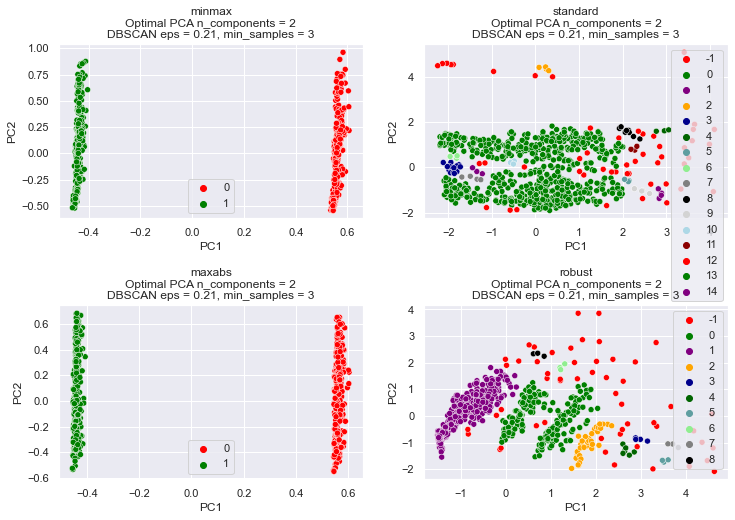

In [277]:
    
# # Create a new figure with the specified size
# fig, ax = plt.subplots(figsize=figsize)

colors = ['red', 'green', 'purple', 'orange', 'darkblue', 'darkgreen', 'cadetblue', 'lightgreen', 'gray', 'black', 'lightgray', 'lightblue', 'darkred'] # lightred is not visible

# Initialize subplots for each scaler
fig, axs = plt.subplots(2, 2, figsize=figsize)
fig.subplots_adjust(hspace=0.5)

# Initialize a dictionary to store the cluster labels
labels_by_scaler = {}


# Loop through different scalers
for i, (scaler_name, scaler) in enumerate(scalers.items()):
    num_clusters = cluster_nums[i]
    # Scale the data
    X_scaled = scaler.fit_transform(X)
    
    # Initialize PCA with 2 components
    pca = PCA(n_components= optimal_n_components_by_scaler_dict[scaler_name])
    
    
    # Fit PCA to the scaled data
    X_pca = pca.fit_transform(X_scaled)
    
    # ======================== KMeans ================================
    # # Initialize KMeans with k clusters
    # kmeans = KMeans(n_clusters=num_clusters, random_state=42, n_init=10)
    
    # # Fit KMeans to the PCA-transformed data
    # kmeans.fit(X_pca)
    
    # # Get the cluster labels
    # labels = kmeans.labels_
    # =================================================================
    
    # ======================== DBSCAN =================================
    from sklearn.cluster import DBSCAN
    eps_value=0.21 
    min_samples_value=3
    # Initialize DBSCAN with eps and min_samples
    dbscan = DBSCAN(eps=eps_value, min_samples=min_samples_value)

    # Fit DBSCAN to the PCA-transformed data
    dbscan.fit(X_pca)

    # Get the cluster labels
    labels = dbscan.labels_

    # =================================================================
    
    
    
    # Plot the clusters on PC1 and PC2 using Seaborn
    sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=labels, palette=colors, ax=axs[i//2, i%2])
    axs[i//2, i%2].set_xlabel('PC1')
    axs[i//2, i%2].set_ylabel('PC2')
    axs[i//2, i%2].set_title(f'{scaler_name}\nOptimal PCA n_components = {optimal_n_components_by_scaler_dict[scaler_name]}\nDBSCAN eps = {eps_value}, min_samples = {min_samples_value}')
    labels_by_scaler[scaler_name] = labels
    
# Save the subplots as PNG files
plt.savefig('data/generated_PX/kmeans_PC1_PC2_by_scalers.png', dpi=300, facecolor='white')



    
    


In [278]:
from tabulate import tabulate

# Print the results
table_data = []
for scaler_name, features in pca_contributing_features.items():
    table_data.append([scaler_name, f"{features['PC1'][0][0]} ({features['PC1'][0][1]}%)", 
                       f"{features['PC1'][1][0]} ({features['PC1'][1][1]}%)",
                       f"{features['PC1'][2][0]} ({features['PC1'][2][1]}%)",
                       f"{features['PC2'][0][0]} ({features['PC2'][0][1]}%)",
                       f"{features['PC2'][1][0]} ({features['PC2'][1][1]}%)",
                       f"{features['PC2'][2][0]} ({features['PC2'][2][1]}%)"])

headers = ["Scaler Name", "PC1 (1st)", "PC1 (2nd)", "PC1 (3rd)", "PC2 (1st)", "PC2 (2nd)", "PC2 (3rd)"]
print(tabulate(table_data, headers=headers, tablefmt="grid"))

+---------------+------------------------------+------------------------------+----------------------------+-------------------------------+-------------------+------------------------------+
| Scaler Name   | PC1 (1st)                    | PC1 (2nd)                    | PC1 (3rd)                  | PC2 (1st)                     | PC2 (2nd)         | PC2 (3rd)                    |
+===============+==============================+==============================+============================+===============================+===================+==============================+
| minmax        | gender_indicator (99.84%)    | CUST_income (5.15%)          | longitude (1.49%)          | CUST_marital_status (80.12%)  | CUST_age (41.74%) | CUST_nbr_children (36.14%)   |
+---------------+------------------------------+------------------------------+----------------------------+-------------------------------+-------------------+------------------------------+
| standard      | CUST_marital_status (5

In [279]:
# Print the results as markdown table
print("| Scaler Name | <span style='color:#FFD700'>PC1</span> Feature 1 | <span style='color:#FFD700'>PC1</span> Feature 2 | <span style='color:#FFD700'>PC1</span> Feature 3 | <span style='color:#90EE90'>PC2</span> Feature 1 | <span style='color:#90EE90'>PC2</span> Feature 2 | <span style='color:#90EE90'>PC2</span> Feature 3 |")
print("| --- | --- | --- | --- | --- | --- | --- |")

for scaler_name, features in pca_contributing_features.items():
    pc1_features = features['PC1'][:3]
    pc2_features = features['PC2'][:3]
    
    # Build row for current scaler
    row = [scaler_name]
    for feature in pc1_features:
        row.append(f"{feature[0]} ({feature[1]}%)")
    for feature in pc2_features:
        row.append(f"{feature[0]} ({feature[1]}%)")
    
    # Print row as markdown table row
    print("| " + " | ".join(row) + " |")


| Scaler Name | <span style='color:#FFD700'>PC1</span> Feature 1 | <span style='color:#FFD700'>PC1</span> Feature 2 | <span style='color:#FFD700'>PC1</span> Feature 3 | <span style='color:#90EE90'>PC2</span> Feature 1 | <span style='color:#90EE90'>PC2</span> Feature 2 | <span style='color:#90EE90'>PC2</span> Feature 3 |
| --- | --- | --- | --- | --- | --- | --- |
| minmax | gender_indicator (99.84%) | CUST_income (5.15%) | longitude (1.49%) | CUST_marital_status (80.12%) | CUST_age (41.74%) | CUST_nbr_children (36.14%) |
| standard | CUST_marital_status (59.59%) | CUST_income (49.1%) | CUST_nbr_children (48.92%) | longitude (69.72%) | latitude (66.89%) | CUST_age (18.05%) |
| maxabs | gender_indicator (99.86%) | CUST_income (5.1%) | CUST_nbr_children (0.78%) | CUST_years_with_bank (94.53%) | CUST_age (29.23%) | CUST_marital_status (12.02%) |
| robust | CUST_nbr_children (75.14%) | CUST_marital_status (51.29%) | CUST_income (39.92%) | CUST_income (64.37%) | CUST_age (50.44%) | CUST_nbr_

| Scaler Name | <span style='color:#FFD700'>PC1</span> Feature 1 | <span style='color:#FFD700'>PC1</span> Feature 2 | <span style='color:#FFD700'>PC1</span> Feature 3 | <span style='color:#90EE90'>PC2</span> Feature 1 | <span style='color:#90EE90'>PC2</span> Feature 2 | <span style='color:#90EE90'>PC2</span> Feature 3 |
| --- | --- | --- | --- | --- | --- | --- |
| minmax | CUST_marital_status (85.87%) | CUST_nbr_children (48.15%) | CUST_income (16.91%) | longitude (80.92%) | latitude (57.82%) | CUST_marital_status (7.53%) |
| standard | CUST_nbr_children (62.7%) | CUST_marital_status (60.54%) | CUST_income (46.9%) | longitude (70.14%) | latitude (69.26%) | CUST_income (13.88%) |
| maxabs | CUST_marital_status (69.04%) | CUST_nbr_children (68.26%) | CUST_income (23.82%) | CUST_marital_status (71.5%) | CUST_nbr_children (67.42%) | CUST_income (12.64%) |
| robust | CUST_nbr_children (77.09%) | CUST_marital_status (50.37%) | CUST_income (38.88%) | CUST_income (90.44%) | CUST_nbr_children (35.95%) | longitude (14.86%) |

## Radar Chart subplots

In [280]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.io as pio

# define the categories
categories = selected_columns # ['CUST_income', 'CUST_age', 'CUST_years_with_bank', 'CUST_nbr_children', 'CUST_marital_status']

scalers = {
    'minmax': MinMaxScaler(),
    'standard': StandardScaler(),
    'maxabs': MaxAbsScaler(),
    'robust': RobustScaler()
}

for scaler_name, labels in labels_by_scaler.items():
    twm_customer_wrk2_for_radar = twm_customer_wrk2.copy()

    twm_customer_wrk2_for_radar = twm_customer_wrk2_for_radar[categories]

    # using the scaler_name to apply the scaler
    scaler = scalers[scaler_name]
    twm_customer_wrk2_for_radar_scaled = scaler.fit_transform(twm_customer_wrk2_for_radar)

    # find the number of clusters
    num_of_clusters = len(np.unique(labels))

    # create a new column with the cluster labels
    twm_customer_wrk2_for_radar_scaled = pd.DataFrame(twm_customer_wrk2_for_radar_scaled, columns=twm_customer_wrk2_for_radar.columns)
    twm_customer_wrk2_for_radar_scaled['label'] = pd.Series(labels, dtype=int)

    # group by label and find the mean
    twm_customer_wrk2_for_radar_scaled_pivot = twm_customer_wrk2_for_radar_scaled.groupby('label').mean()

    # get the number of clusters
    num_clusters = twm_customer_wrk2_for_radar_scaled_pivot.shape[0]
    
    # min and max of all value in twm_customer_wrk2_for_radar_pivot
    radar_min = twm_customer_wrk2_for_radar_scaled_pivot.min().min()
    radar_max = twm_customer_wrk2_for_radar_scaled_pivot.max().max()
    
    # create a subplot for each cluster
    fig = make_subplots(rows=1, cols=num_clusters, subplot_titles=[f'Cluster {i}' for i in range(num_clusters)],
                        specs=[[{'type': 'polar'}] * num_clusters])

    # loop through the clusters and add a trace to each subplot
    for i in range(num_clusters):
        fig.add_trace(go.Scatterpolar(
            r=twm_customer_wrk2_for_radar_scaled_pivot.iloc[i].tolist(),
            theta=categories,
            fill='toself',
            name=f'Cluster {i}'
        ), row=1, col=i+1)

        # set the layout of the subplot
        fig.update_layout(
            polar=dict(
                radialaxis=dict(
                    visible=True,
                    range=[radar_min, radar_max]
                )),
            showlegend=False
        )

    # set the title of the figure
    fig.update_layout(title=f'Radar Chart - {scaler_name.capitalize()}')

    # save the figure as PNG
    fig.write_image(f'data/generated_PX/radar_{scaler_name}.png', width=1200, height=600, scale=2)
